# Heart Disease Detection with LIME Explanations and Prevention Suggestions using Web Scraping

## Table Of Contents:
<a class="anchor" id="Top"></a>
* [Importing all the required Libraries](#first-bullet)
* [Understanding Data](#second-bullet)
* [Handling Missing Data](#third-bullet)
* [Descriptive Statistics](#fourth-bullet)
* [Exploratory Data Analysis](#fifth-bullet)
    * [Univariate analysis](#uni-bullet)
    * [Multivariate analysis](#bi-bullet)
* [Applying Machine Learning Models](#sixth-bullet)
    * [Feature Selection](#ninth-1-bullet)
    * [Test - Train Split](#tenth-1-bullet)
    * [Logistic Regression](#eleventh-1-bullet)
    * [Neural Networks](#12-1-bullet)
    * [Random Forest Classifier](#13-1-bullet)
    * [KNN Classifier](#14-1-bullet)
    * [Gradient Boosting Classifier](#15-1-bullet)
    * [Support Vector Classifier](#16-1-bullet)
    * [Decision Tree Classifier](#17-1-bullet)
    * [ROC Curves](#18-1-bullet)
* [Detection using Balanced Data](#seventh-bullet)
    * [Data Resampling](#eighth-bullet)
    * [Feature Selection](#ninth-bullet)
    * [Test - Train Split](#tenth-bullet)
    * [Logistic Regression](#eleventh-bullet)
    * [Neural Networks](#12-bullet)
    * [Random Forest Classifier](#13-bullet)
    * [KNN Classifier](#14-bullet)
    * [Gradient Boosting Classifier](#15-bullet)
    * [Support Vector Classifier](#16-bullet)
    * [Decision Tree Classifier](#17-bullet)
    * [ROC Curves](#18-bullet)
* [Feature Importance using LIME](#19-bullet)
* [Disease Prevention Using Web Crawling](#20-bullet)

## <a class="anchor" id="first-bullet"></a> Importing all required libraries
*[Back to Top](#Top)

In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
import keras
import pickle
import re
import spacy
from spacy import displacy
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx
from tqdm import tqdm

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import xgboost as xgb
from collections import Counter

from sklearn.preprocessing import RobustScaler, MinMaxScaler
import os
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

## <a class="anchor" id="second-bullet"></a>  Understanding Data
*[Back to Top](#Top)

In [120]:
data_frame = pd.read_csv("C:/Users/ADMIN/Downloads/framingham.csv")

In [121]:
data_frame.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [122]:
print ('No. of Records :', data_frame.shape[0], '\nNo. of Features : ', data_frame.shape[1])

No. of Records : 4240 
No. of Features :  16


In [123]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [125]:
data_frame.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [124]:
data_frame.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

## Observations:

1. Focusing on Continuous Features:

    Instead of analyzing all features, let's concentrate on the continuous ones, as some are discrete.


2. Age Distribution:

    The age range in our dataset spans from 32 to 70 years old, with the youngest subject being 32 and     the oldest being 70.


3. Cigarettes per Day:

    The data reveals a smoking habit ranging from non-existent (0 cigarettes per day) to a maximum of     70 cigarettes per day.


4. Total Cholesterol Levels:

    The cholesterol levels vary considerably within the dataset, with a minimum of 107 and a maximum       of 696.


5. Systolic Blood Pressure Range:

    The systolic blood pressure readings show a range between 83 and 295.


6. Diastolic Blood Pressure Range:

    The diastolic blood pressure readings range from 48 to 142.


7. Body Mass Index (BMI):

    The dataset exhibits a BMI range of 15.54 to 56.


8. Heart Rate:

    The observed heart rates in the study fall between 44 and 143 beats per minute.


9. Blood Glucose Levels:

    The blood glucose levels range from 40 to 394 milligrams per deciliter (mg/dL).


## <a class="anchor" id="third-bullet"></a>  Handle missing data by substituting median
*[Back to Top](#Top)

In [126]:
def impute_median(data):
    return data.fillna(data.median())

In [127]:
#median imputation
data_frame.glucose = data_frame['glucose'].transform(impute_median)
data_frame.education = data_frame['education'].transform(impute_median)
data_frame.heartRate = data_frame['heartRate'].transform(impute_median)
data_frame.totChol = data_frame['totChol'].transform(impute_median)
data_frame.BPMeds = data_frame['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes
by_currentSmoker = data_frame.groupby(['currentSmoker'])
data_frame.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = data_frame.groupby(['male','age'])
data_frame.BMI = by_age['BMI'].transform(impute_median)

In [128]:
data_frame = data_frame.dropna(how = 'any', axis = 0)
print(data_frame.shape)
data_frame.head()

(4240, 16)


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [129]:
data_frame.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [130]:
print ('No. of Records :', data_frame.shape[0], '\nNo. of Features : ', data_frame.shape[1])
print(data_frame.head())

No. of Records : 4240 
No. of Features :  16
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   Te

## <a class="anchor" id="fourth-bullet"></a> Descriptive Statistics
*[Back to Top](#Top)

In [131]:
print('Gender')
print(data_frame['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(data_frame['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(data_frame['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(data_frame['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(data_frame['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(data_frame['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
0    0.570755
1    0.429245
Name: male, dtype: float64
----


Education
1.0    0.405660
2.0    0.320283
3.0    0.162500
4.0    0.111557
Name: education, dtype: float64
----


BP Medication
0.0    0.970755
1.0    0.029245
Name: BPMeds, dtype: float64
----


Stroke
0    0.994104
1    0.005896
Name: prevalentStroke, dtype: float64
----


Hypertension
0    0.689387
1    0.310613
Name: prevalentHyp, dtype: float64
----


Diabetes
0    0.974292
1    0.025708
Name: diabetes, dtype: float64
----




## Conclusions drawn from above data:

* The data suggests a majority female population (57%) compared to males (42%).
* A significant portion (over 60%) of the patients in the database have a low education level (below level 2).
* Medication for blood pressure (BP) is not prescribed for a large majority (97%) of the patients.
* There is a very low prevalence of prior stroke (only 1% of patients have had a stroke).
* Hypertension is present in a minority (31%) of the patients, with the majority (69%) not having hypertension.
* Diabetes is uncommon (only 3% of users are diabetic).


In [132]:
disease = data_frame.groupby('TenYearCHD')

print('Gender')
print(disease['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(disease['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(disease['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(disease['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(disease['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(disease['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
TenYearCHD  male
0           0       0.589266
            1       0.410734
1           1       0.532609
            0       0.467391
Name: male, dtype: float64
----


Education
TenYearCHD  education
0           1.0          0.388487
            2.0          0.332314
            3.0          0.167130
            4.0          0.112069
1           1.0          0.501553
            2.0          0.253106
            3.0          0.136646
            4.0          0.108696
Name: education, dtype: float64
----


BP Medication
TenYearCHD  BPMeds
0           0.0       0.976919
            1.0       0.023081
1           0.0       0.936335
            1.0       0.063665
Name: BPMeds, dtype: float64
----


Stroke
TenYearCHD  prevalentStroke
0           0                  0.996107
            1                  0.003893
1           0                  0.982919
            1                  0.017081
Name: prevalentStroke, dtype: float64
----


Hypertension
TenYearCHD  prevalentHyp
0           

## Conclusions drawn from the above data:

* Gender may influence susceptibility to heart disease, with a slightly higher percentage observed in males compared to females.
* While lower education levels appear correlated with higher susceptibility, it's important to consider that the majority of the patients belong to this group. More data analysis is necessary to isolate the true impact of education level.
* The prevalence of pre-existing conditions like stroke and diabetes seems low and may not significantly influence heart disease in this dataset.
* Hypertension shows a clear correlation with heart disease. A significantly higher percentage of patients diagnosed with hypertension have heart disease compared to those without hypertension. 

##  <a class="anchor" id="fifth-bullet"></a> Exploratory Data Analysis
*[Back to Top](#Top)

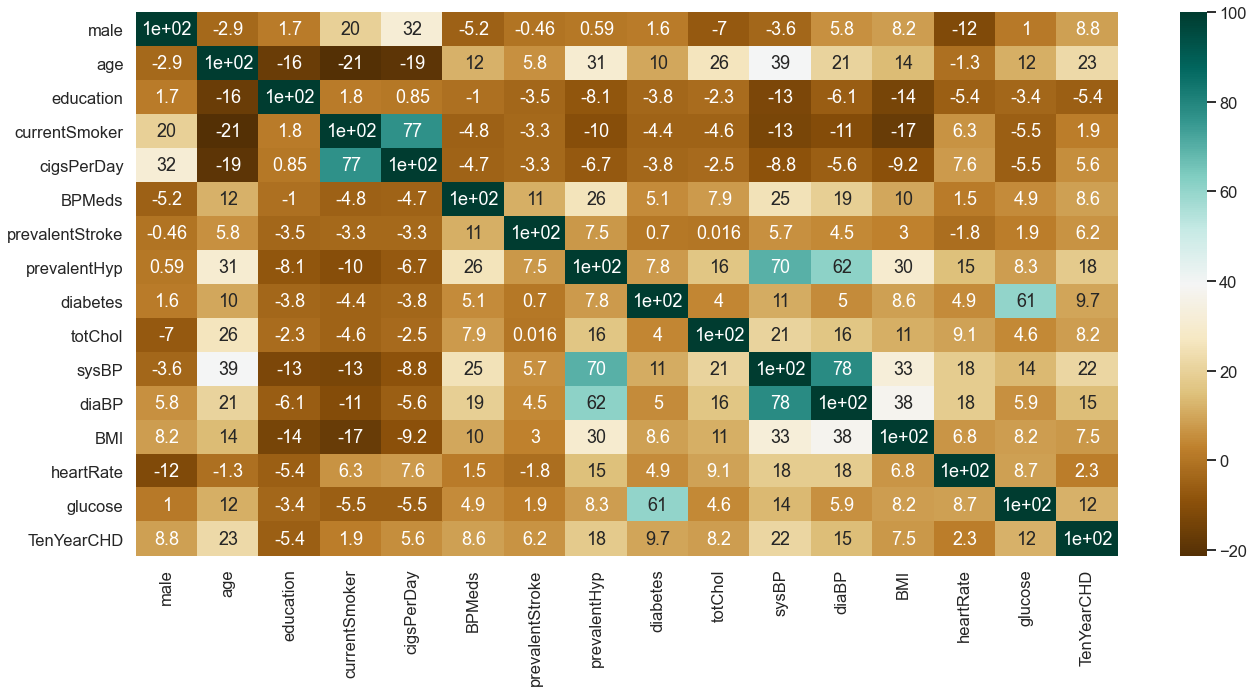

In [133]:
sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(data_frame.corr()*100, annot=True, cmap='BrBG')

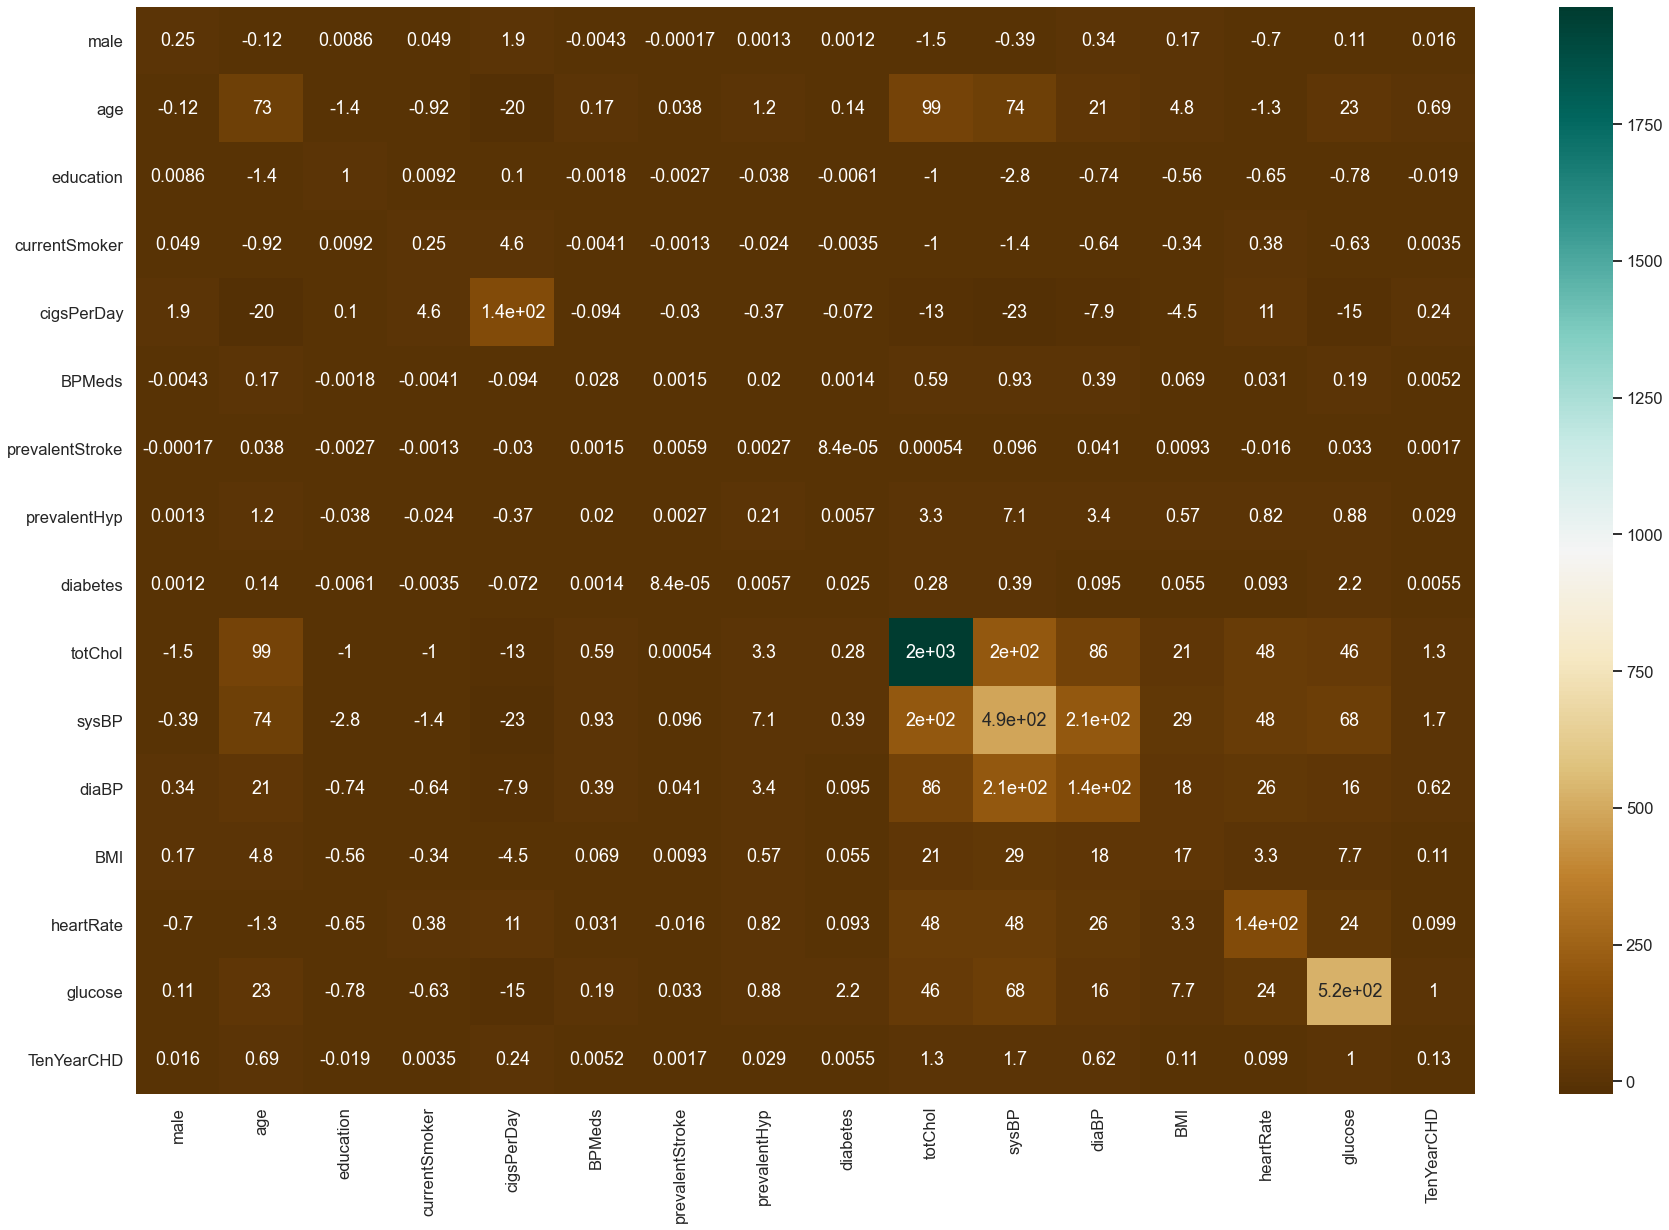

In [134]:
sns.set_context('talk')
plt.figure(figsize=(30,20))
sns.heatmap(data_frame.cov(), annot=True, cmap='BrBG')

### Observations drawn from above matrices:

There seems to be a decently strong correlation between sysBP and diaBP as well as there is negative corelation between education and output variable. Hence we will remove this column later

## <a class="anchor" id="uni-bullet"></a> Univariate Analysis
*[Back to Top](#Top)

In [135]:
categorical_features = ['male','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for feature in categorical_features:
    print(feature,':')
    print(data_frame[feature].value_counts())
    print("-----------------")

male :
0    2420
1    1820
Name: male, dtype: int64
-----------------
currentSmoker :
0    2145
1    2095
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    4116
1.0     124
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    4215
1      25
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2923
1    1317
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    4131
1     109
Name: diabetes, dtype: int64
-----------------


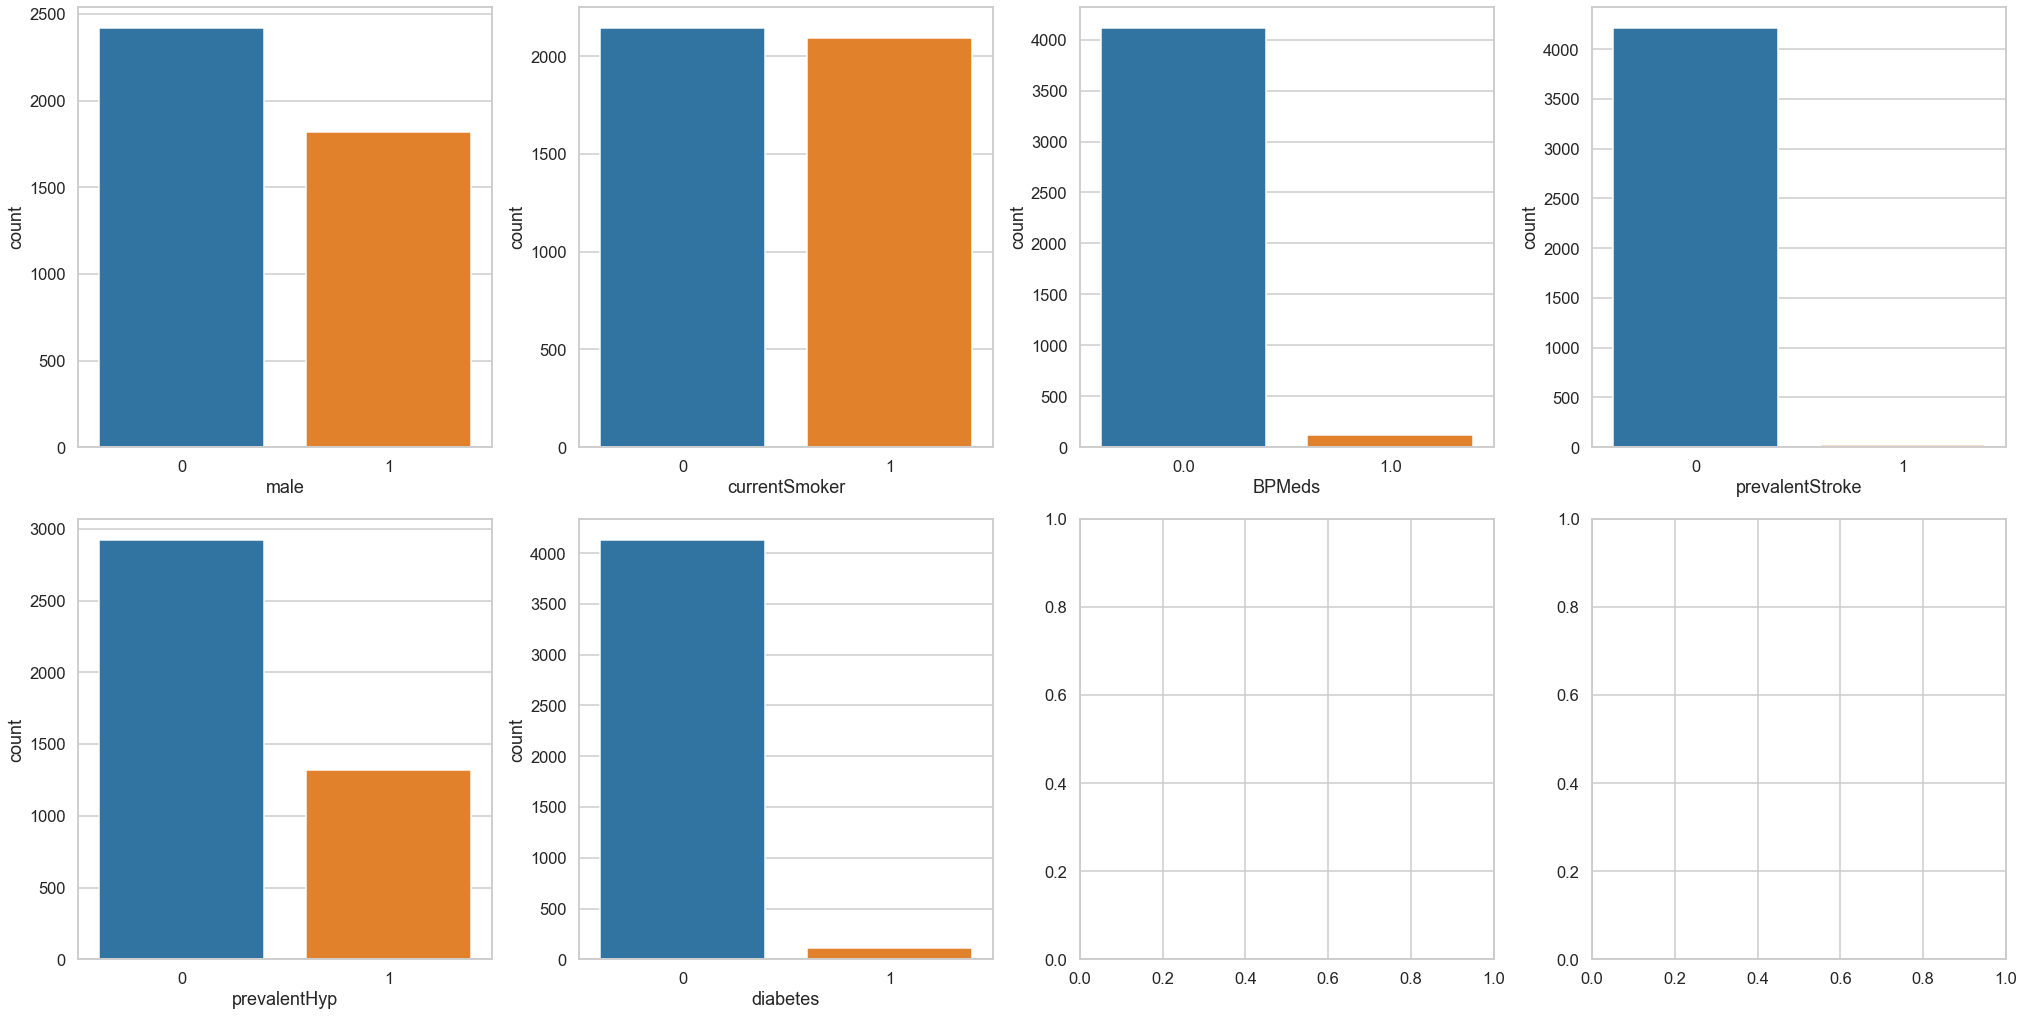

In [136]:
num_plots = len(categorical_features)
total_cols = 4
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data_frame, ax=axs[row][pos])

## Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.
There are four levels of education whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in currentSmoker is almost the same

Text(0.5, 1.0, 'CHD by Gender')

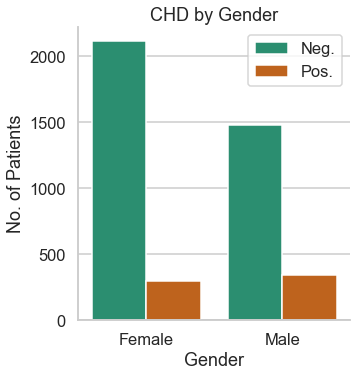

In [137]:
#CHD by Gender Viz.
sns.catplot(x='male', hue='TenYearCHD', data=data_frame, kind='count', palette='Dark2', legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

## Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.
There are four levels of education whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in currentSmoker is almost the same

Observations :

1. Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).
2. Observations tells us that we've Excessive number of people who are not suffering from CHD.
3. Negative : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.
4. Positive : While Approx. 10% of Females & Males are suffering from CHD.
5. By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

<ipython-input-138-4d6d43800cf2>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_frame.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CCE6E91FD0>,
      dtype=object)

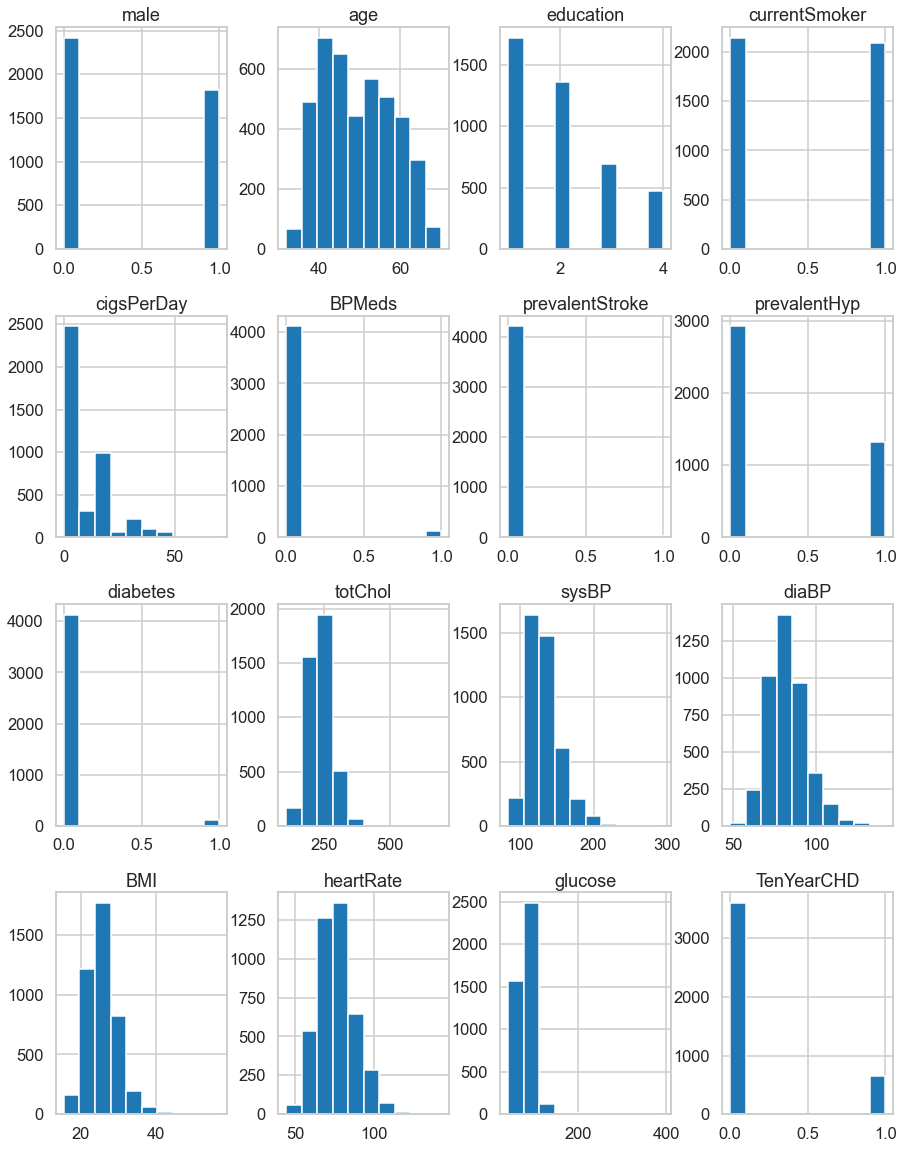

In [138]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_frame.hist(ax = ax)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Distribution of HeartRate')

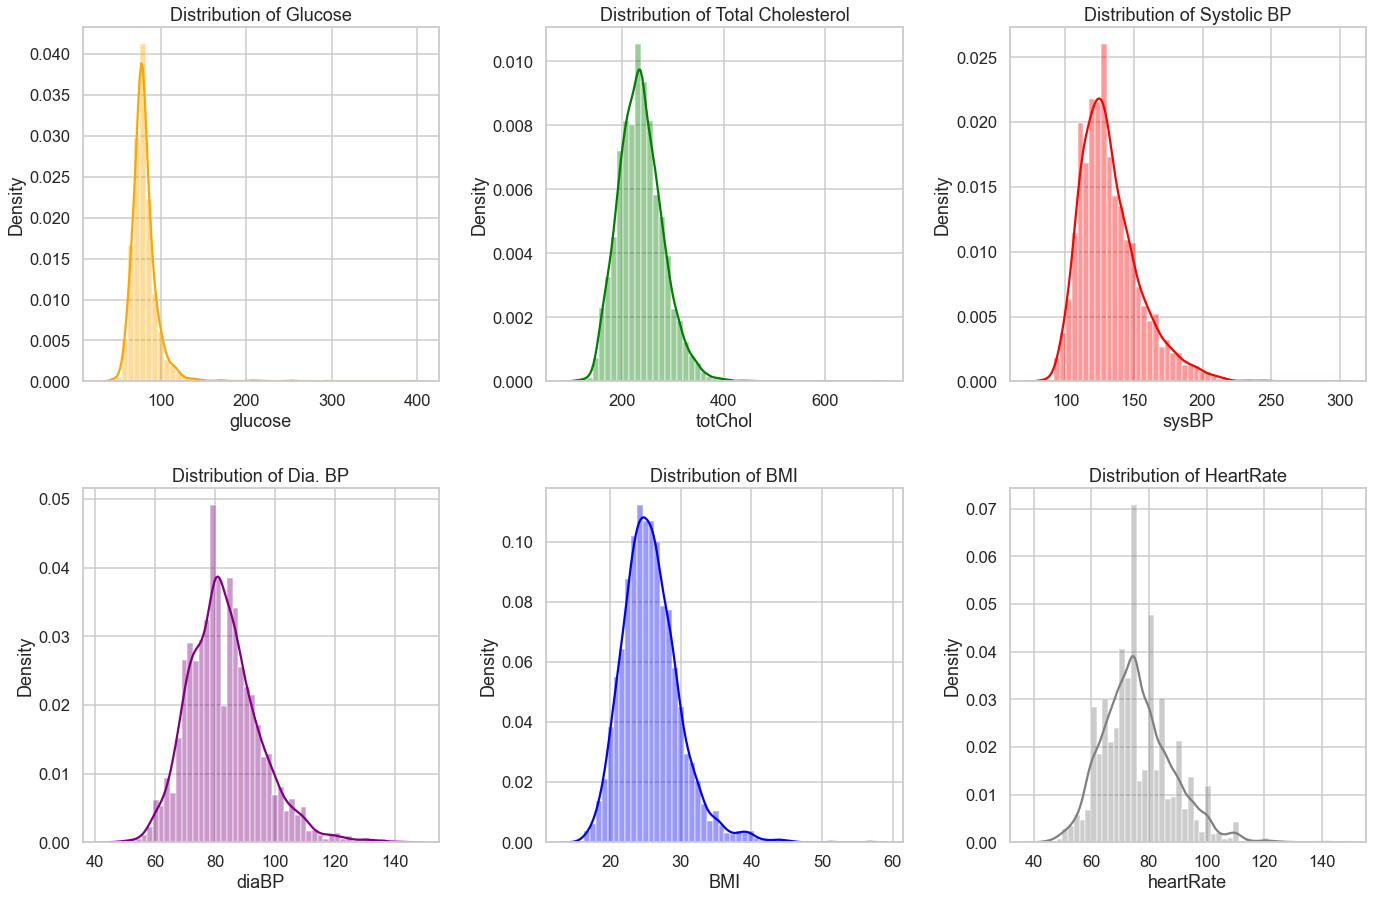

In [139]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(data_frame['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(data_frame['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(data_frame['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(data_frame['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(data_frame['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(data_frame['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

## Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.
There are four levels of education whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in currentSmoker is almost the same

Observations :

1. Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).
2. Observations tells us that we've Excessive number of people who are not suffering from CHD.
3. Negative : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.
4. Positive : While Approx. 10% of Females & Males are suffering from CHD.
5. By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

Observations :

1. We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.
2. While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Agewise distribution of the patients')

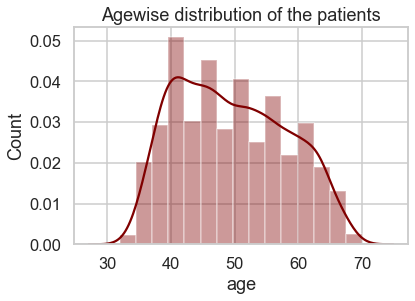

In [140]:
sns.distplot(data_frame['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

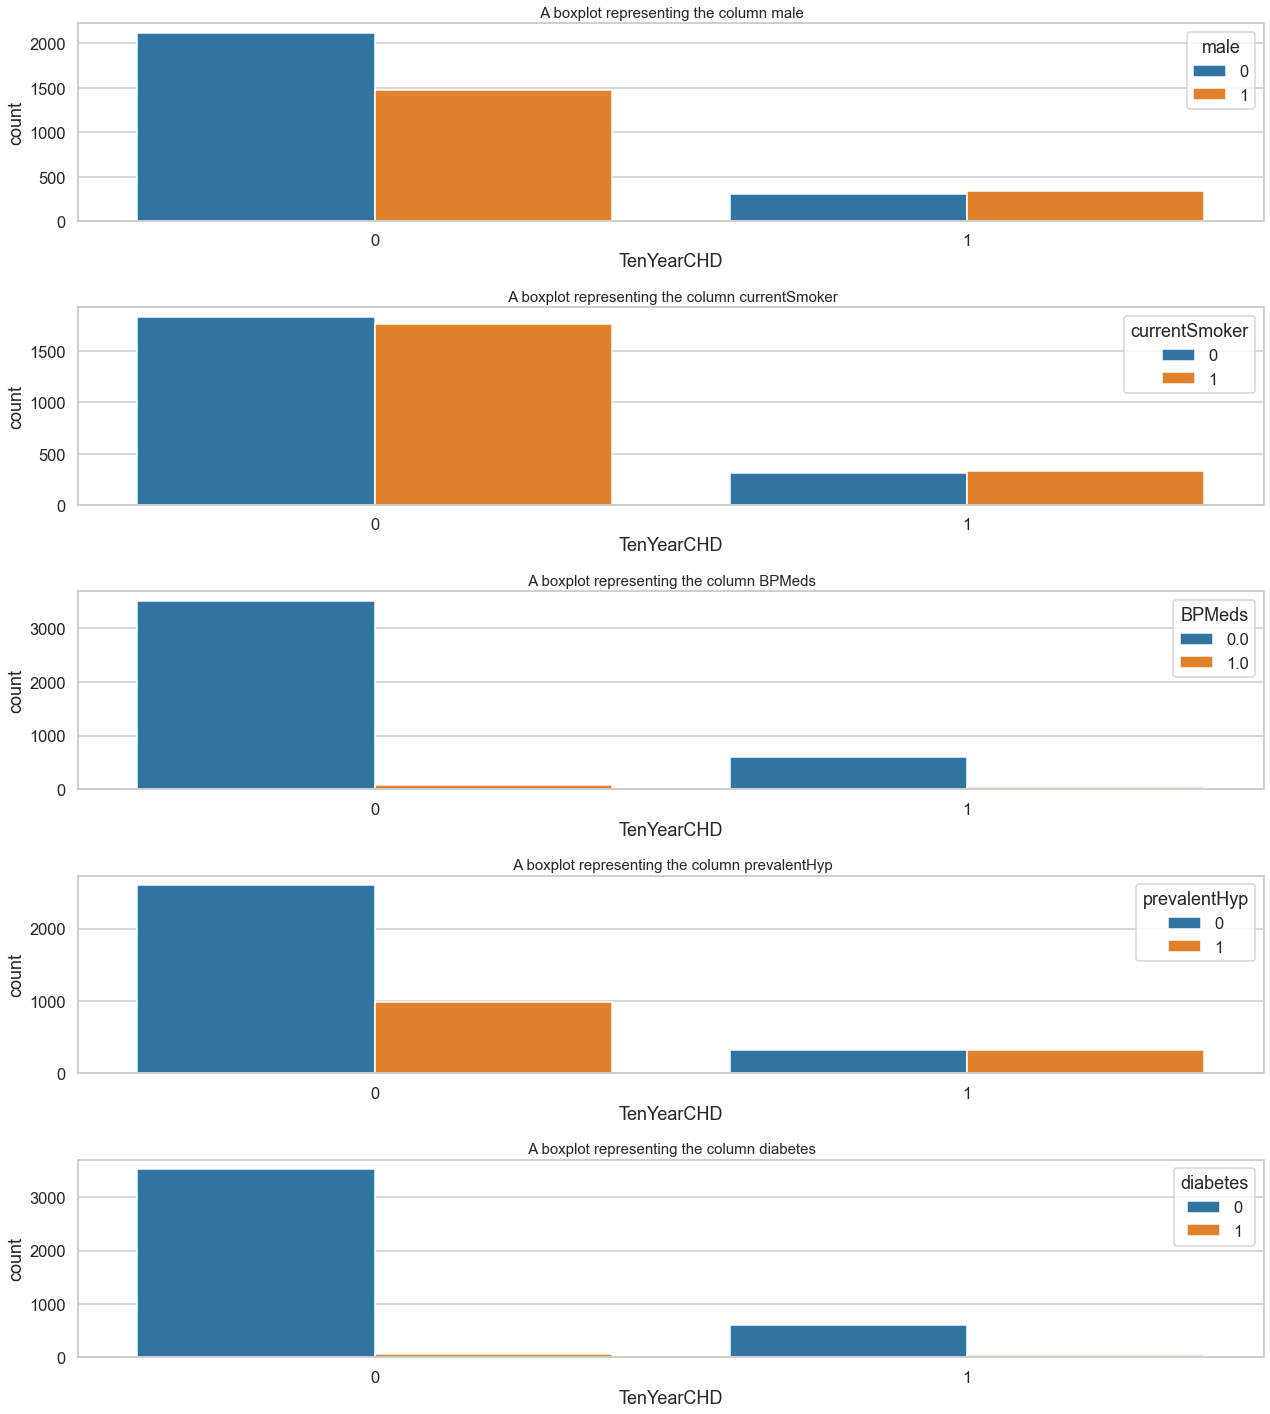

In [141]:
dataset_binary = ['male', 'currentSmoker','BPMeds','prevalentHyp', 'diabetes']

fig, ax = plt.subplots (len(dataset_binary), figsize = (18, 20))
for n,k in enumerate(dataset_binary):
    sns.countplot(x=data_frame['TenYearCHD'], hue = data_frame[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)

## Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.
There are four levels of education whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in currentSmoker is almost the same

Observations :

1. Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).
2. Observations tells us that we've Excessive number of people who are not suffering from CHD.
3. Negative : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.
4. Positive : While Approx. 10% of Females & Males are suffering from CHD.
5. By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

Observations :

1. We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.
2. While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution
The above plots show that male and Current Smokers are at high risk of getting a heart disease

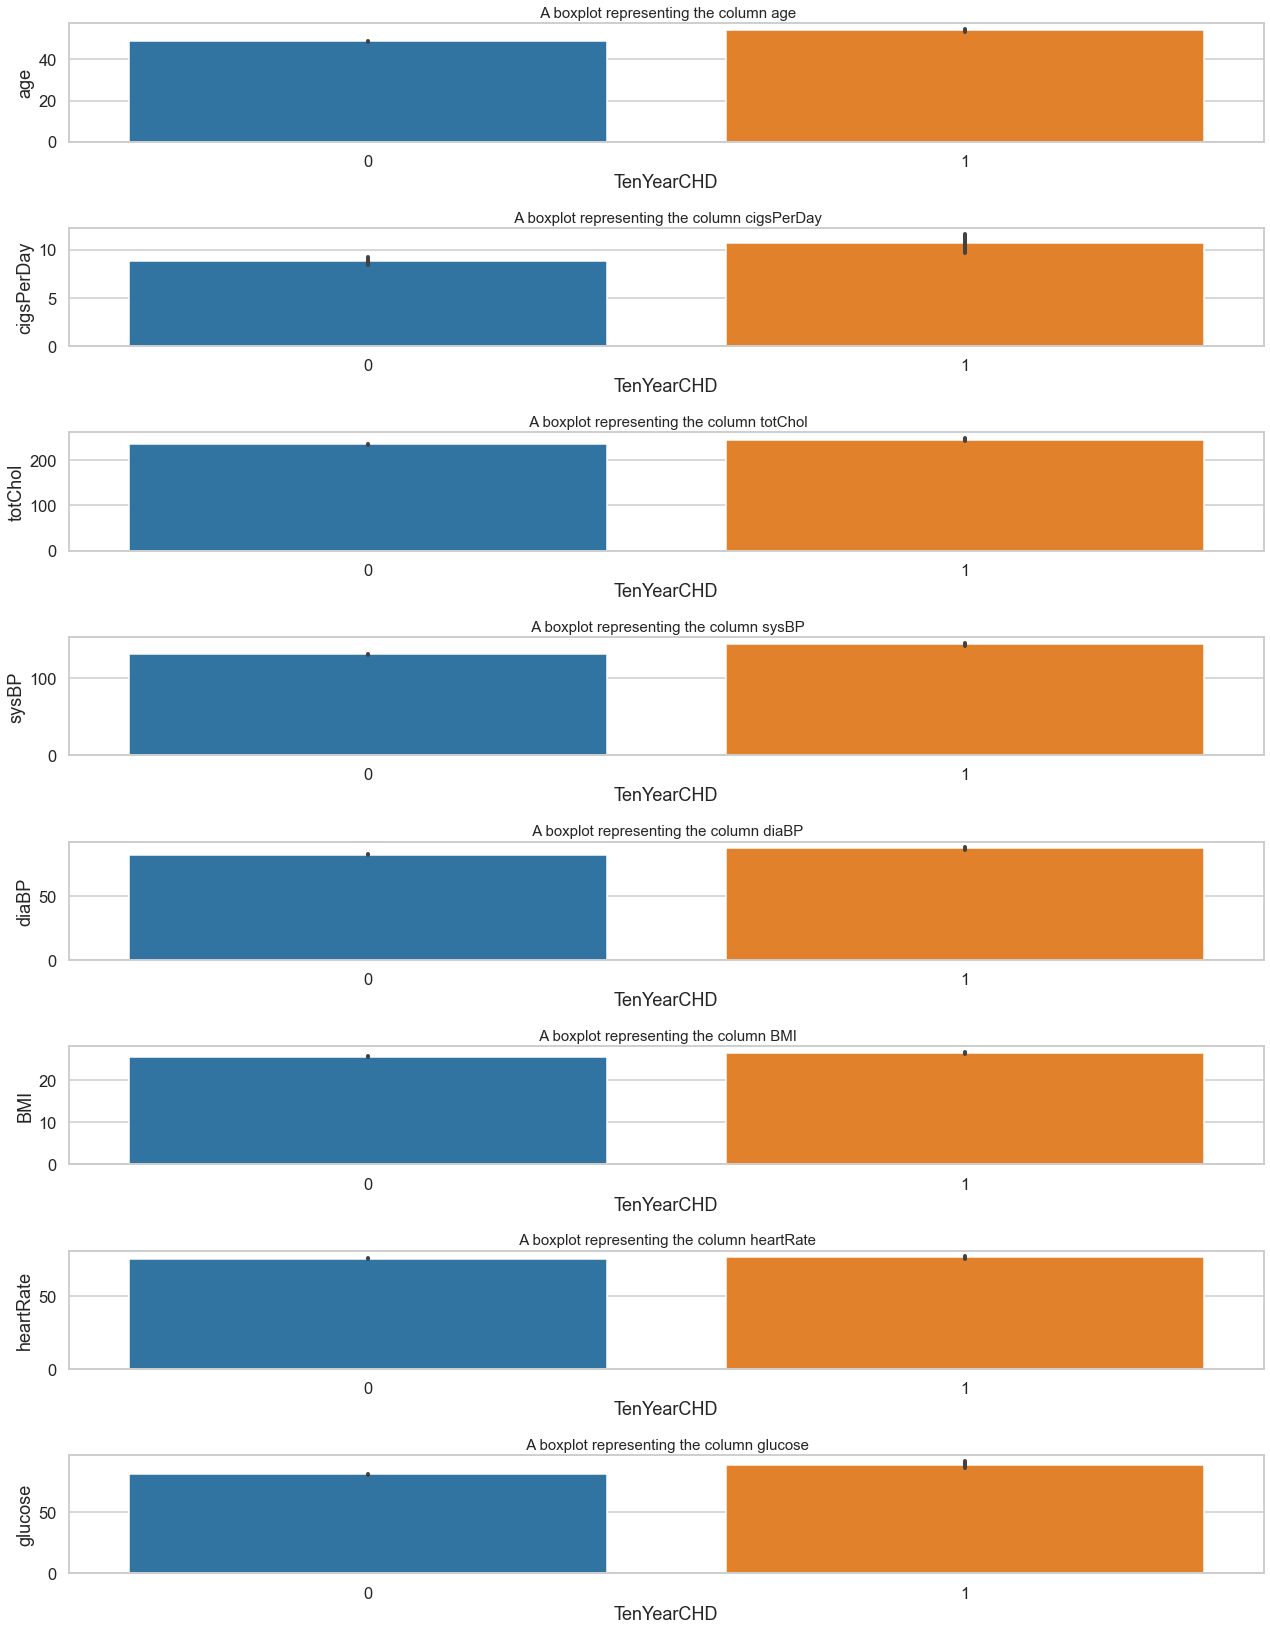

In [142]:
dataset_num = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
fig, ax = plt.subplots (len(dataset_num), figsize = (18, 23))
for n,k in enumerate(dataset_num):
    sns.barplot(x=data_frame['TenYearCHD'], y = data_frame[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)

## Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.
There are four levels of education whereas the rest categorical features are all binary
The number of Smokers and non-Smokers in currentSmoker is almost the same

Observations :

1. Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).
2. Observations tells us that we've Excessive number of people who are not suffering from CHD.
3. Negative : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.
4. Positive : While Approx. 10% of Females & Males are suffering from CHD.
5. By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

Observations :

1. We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.
2. While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution
The above plots show that male and Current Smokers are at high risk of getting a heart disease
Observation :

Subjects ranging from Age 40 to 50 are in Majority followed by 50 to 70.

In [143]:
#User-defined function

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
data_frame['enc_hr'] = data_frame['heartRate'].apply(heartrate_enc)
data_frame['encode_age'] = data_frame['age'].apply(lambda x : encode_age(x))

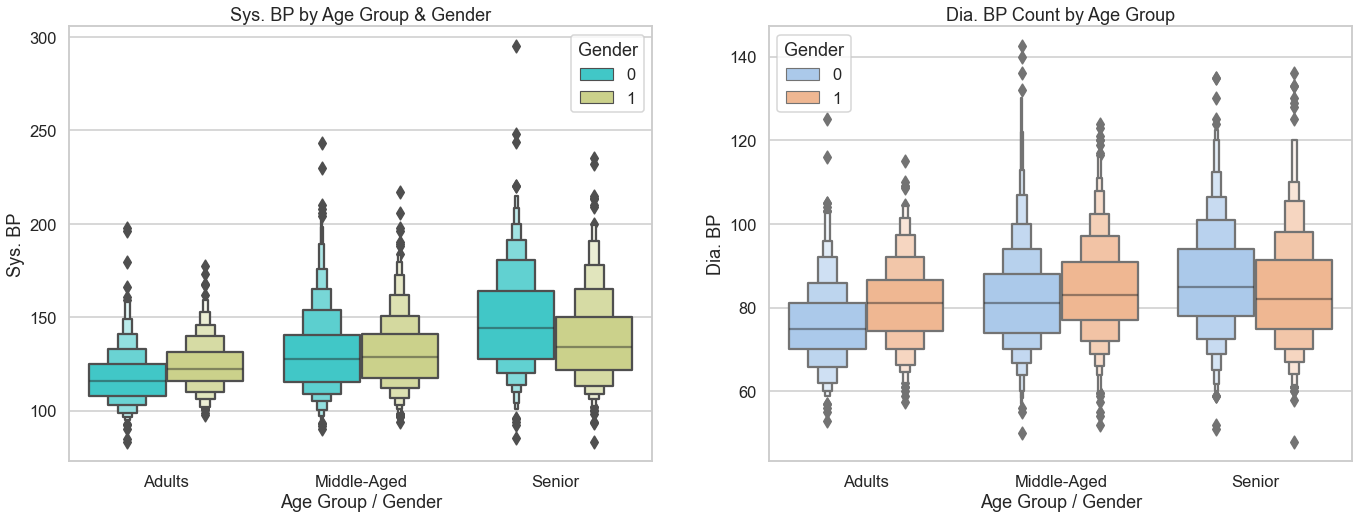

In [144]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=data_frame, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=data_frame, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

## Among the categorical features:

<b>Imbalanced classes</b>: BP medications (BPmeds), previous stroke (prevalentStroke), and diabetes exhibit significant class imbalance. There's a much higher proportion of patients without these conditions.

Mixed cardinality: Education level has four categories, while other categorical features are binary (yes/no or presence/absence).

Balanced smoker distribution: The number of smokers and non-smokers in the "currentSmoker" category is relatively balanced.

## Observations on Chronic Heart Disease (CHD) and Gender:

Gender and CHD: The above bivariate analysis visualizes the distribution of CHD across genders.
Class imbalance: The data shows a significant imbalance in CHD presence.  
    Negative class:  A very high percentage (80-90%) of females and (60-70%) of males fall into the category without CHD.
    Positive class: Conversely, a small percentage (10%) of both females and males have CHD.
Imbalanced dataset:  This suggests a class imbalance in the overall dataset, with a majority (80-90%) belonging to the negative class and a minority (10-15%) to the positive class.

## Observations on Continuous Features:

Glucose, total cholesterol, systolic blood pressure (BP), and body mass index (BMI) exhibit a right skew, meaning the data       is concentrated on the left side of the distribution with a tail extending towards higher values.
    
Diastolic blood pressure (BP) and heart rate appear closer to a normal or Gaussian distribution, with data points more           evenly distributed around the average.

## Observations on Risk Factors:

These plots suggest potential risk factors for heart disease:

Gender: Males might be at a higher risk compared to females.
Smoking: Current smokers could be more susceptible.

## Observation on Age Distribution:

Age group: The majority of subjects fall within the 40-50 age range, followed by the 50-70 age group.

## Observations on Blood Pressure by Age and Gender:

Blood pressure and age: Both systolic and diastolic blood pressure appear to increase with age for both genders.


## <a class="anchor" id="bi-bullet"></a> Multivariate Analysis
*[Back to Top](#Top)

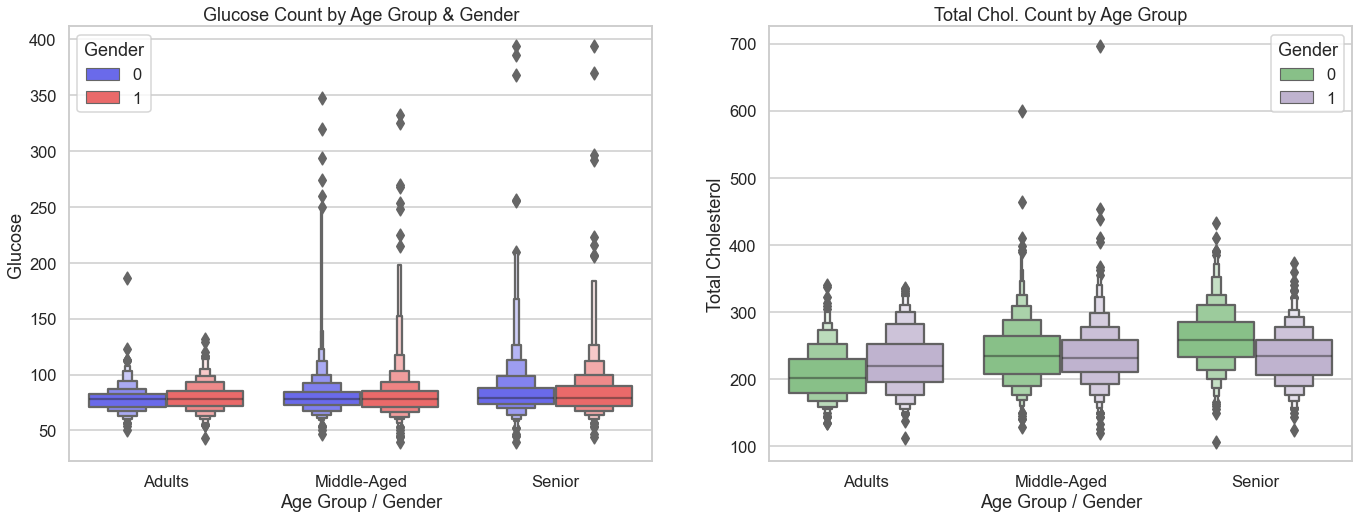

In [145]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=data_frame, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=data_frame, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

Observations :

1. Glucose Count by Age Group & Gender : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.
2. Total Cholesterol by Age Group & Gender : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Cigs. per day by Age Group')

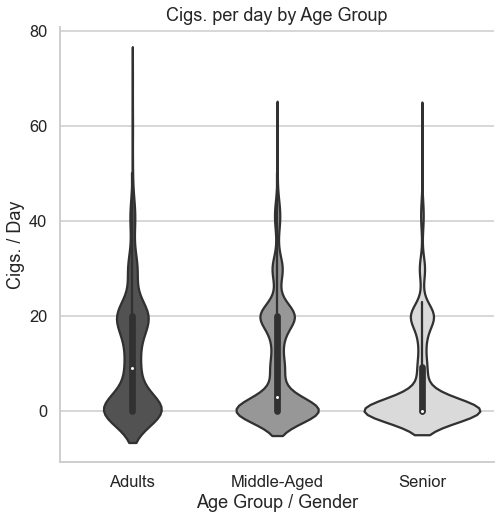

In [146]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=data_frame, x='encode_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

Observations :

1. Glucose Count by Age Group & Gender : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.
2. Total Cholesterol by Age Group & Gender : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

## Observation :

1. Adults : In Adults we can observe that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.
2. Middle-Aged : In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.
3. Senior : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

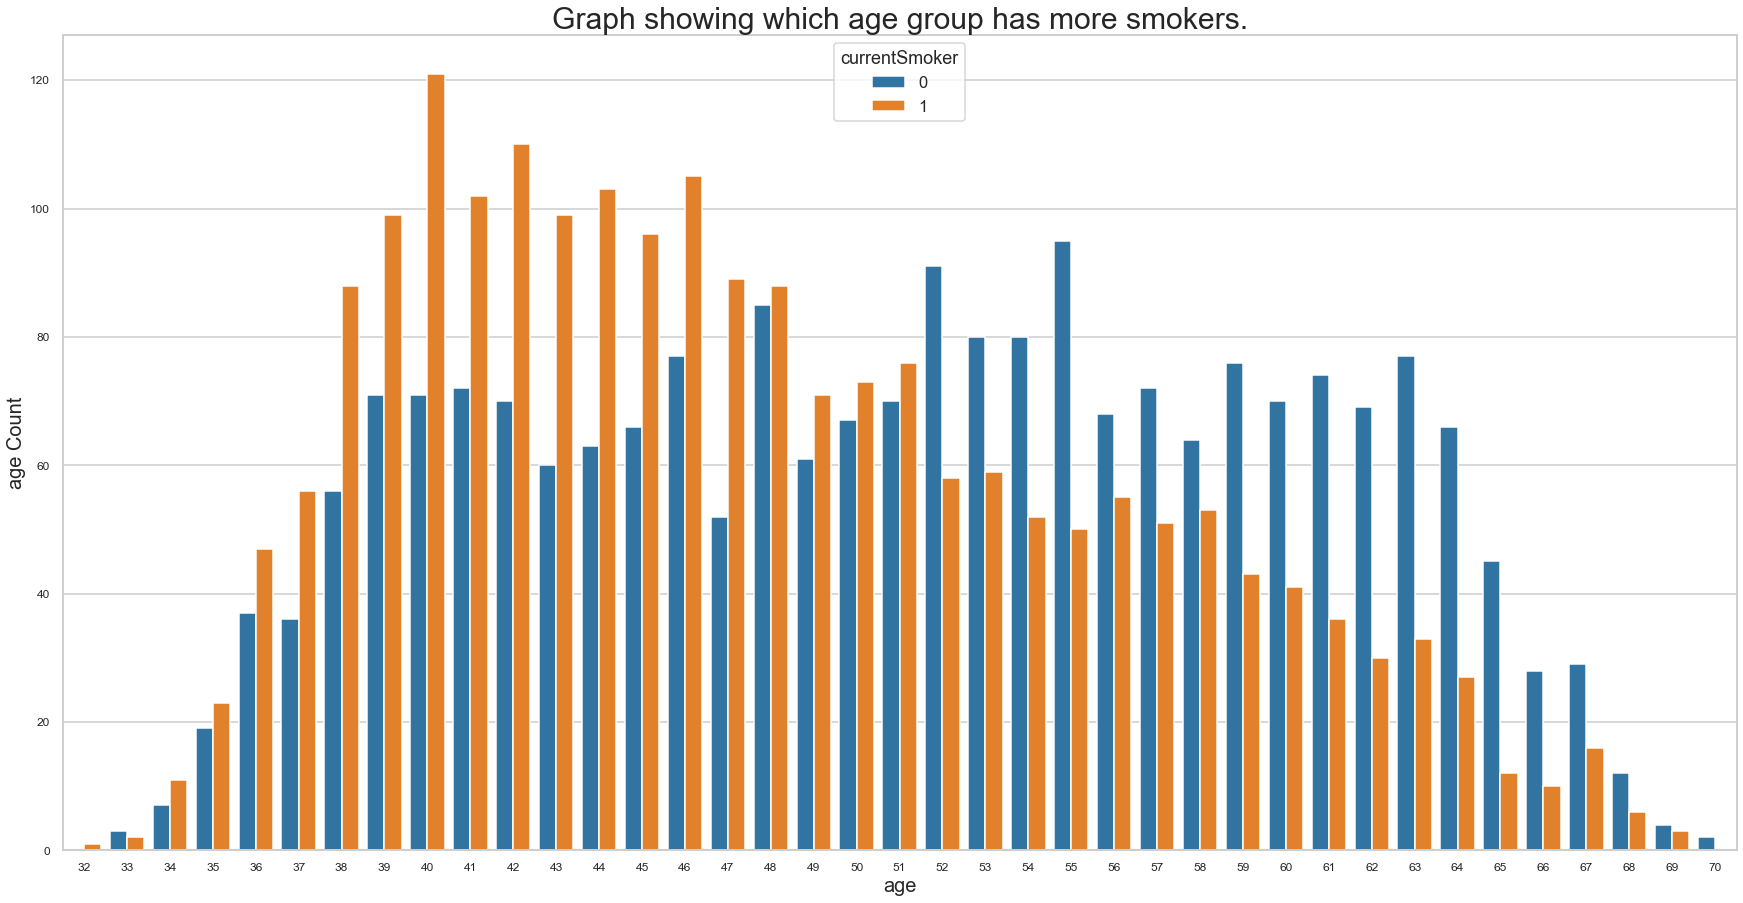

In [147]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data_frame,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Observations :

1. Glucose Count by Age Group & Gender : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.
2. Total Cholesterol by Age Group & Gender : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

## Observation :

1. Adults : In Adults we can observe that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.
2. Middle-Aged : In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.
3. Senior : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

## Observation-
Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
No currentSmokers observed below the age of 32
maximum age for a currentSmokers is 70

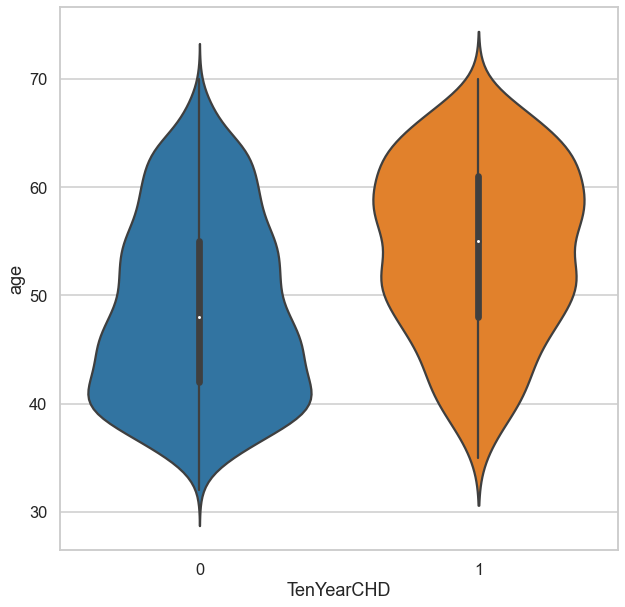

In [148]:
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=data_frame)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

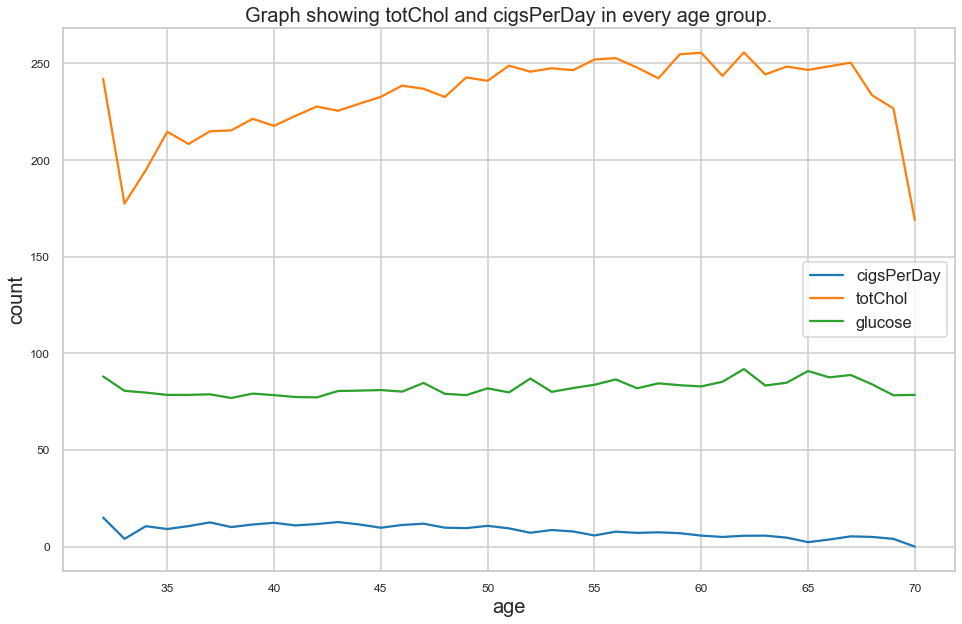

In [149]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

var1 = data_frame.groupby("age").cigsPerDay.mean()
var2 = data_frame.groupby("age").totChol.mean()
var3 = data_frame.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=var1, label="cigsPerDay")
sns.lineplot(data=var2, label="totChol")
sns.lineplot(data=var3, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

## Observations on Glucose and Age/Gender:

* **Glucose and age:** There's a positive correlation between glucose levels and age. As age increases, glucose levels tend to increase as well.
* **Glucose and gender:** Gender doesn't seem to significantly impact median glucose levels. However, there might be a few outliers in each category.

## Observations on Total Cholesterol and Age/Gender:

* **Total cholesterol and age (excluding outliers):** For females, total cholesterol appears to increase with age based on quantile values (25th percentile, median, 75th percentile). 
* **Total cholesterol and age (excluding outliers):** Males, on the other hand, show a relatively stable cholesterol level across age groups based on quantile values.

## Observations on Kernel Density Distribution by Age Group:

* **Adults:** The median value has the lowest kernel density, followed by the upper quartile (75th percentile). The lower quartile (25th percentile) has the highest kernel density. This suggests a distribution skewed towards lower values for adults. 
* **Middle-aged:** Both the lower quartile (25th percentile) and median have higher kernel density, while the upper quartile (75th percentile) has a significantly lower density. This indicates a distribution concentrated in the middle range for the middle-aged group.
* **Seniors:** The median and lower quartile (25th percentile) are close together with high kernel density, while the upper quartile (75th percentile) has a lower density. This suggests a distribution skewed towards the lower end for seniors.  

## Additional Observations:

* A weak correlation exists between total cholesterol and glucose levels.
* Cigarettes smoked per day (cigsPerDay) appears to have a somewhat linear relationship with age, meaning smoking tends to increase with age.

In [272]:
# Dropping columns education
#data_frame = data_frame.drop(['education'], axis=1)

data_frame = data_frame.drop(['diaBP'], axis=1)

In [273]:
data_frame.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0  26.97       80.0     77.0   
1             0         0    250.0  121.0  28.73       95.0     76.0   
2             0         0    245.0  127.5  25.34       75.0     70.0   
3             1         0    225.0  150.0  28.58       65.0    103.0   
4             0         0    285.0  130.0  23.10       85.0     85.0   

   TenYearCHD  enc_hr  encode_age  
0           0       1           0  
1           0       1           1  
2           0       1           1  
3           1       1           2  
4           0       1           1

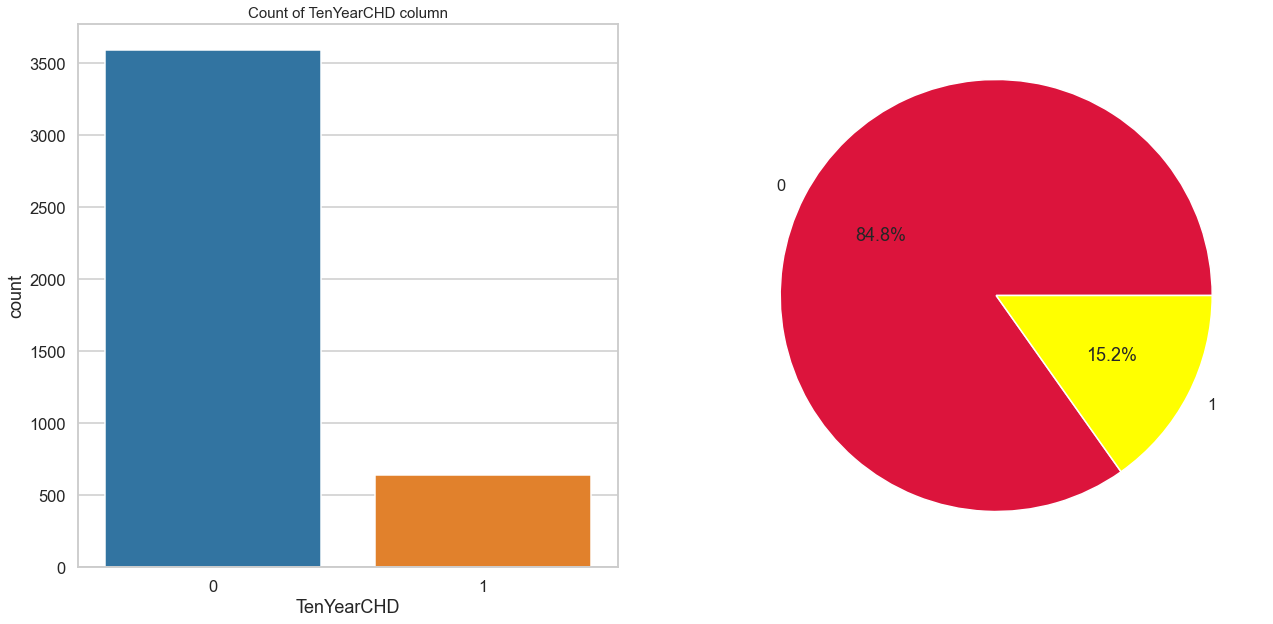

In [274]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data_frame)
plt.title("Count of TenYearCHD column", size=15)
plt.subplot(122)
labels=[0,1]
plt.pie(data_frame["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["crimson","yellow"])
plt.show()

##  <a class="anchor" id="sixth-bullet"></a> Applying Machine Learning Models
*[Back to Top](#Top)

In [275]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = data_frame.iloc[:,0:14]  #independent columns
y = data_frame.iloc[:,-1]    

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

            Specs        Score
1             age  5102.928649
8         totChol  2118.499100
9           sysBP  1955.658145
3      cigsPerDay  1894.059383
12        glucose   310.363459
6    prevalentHyp   219.053700
13     TenYearCHD   148.402693
2   currentSmoker    68.821571
4          BPMeds    61.934327
10            BMI    42.057765
7        diabetes    30.401292


In [276]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs        Score
1               age  5102.928649
8           totChol  2118.499100
9             sysBP  1955.658145
3        cigsPerDay  1894.059383
12          glucose   310.363459
6      prevalentHyp   219.053700
13       TenYearCHD   148.402693
2     currentSmoker    68.821571
4            BPMeds    61.934327
10              BMI    42.057765
7          diabetes    30.401292
5   prevalentStroke    10.900223
11        heartRate     6.479489
0              male     0.841330

<a class="anchor" id="ninth-1-bullet"></a> 
# Feature Selection
*[Back to Top](#Top)

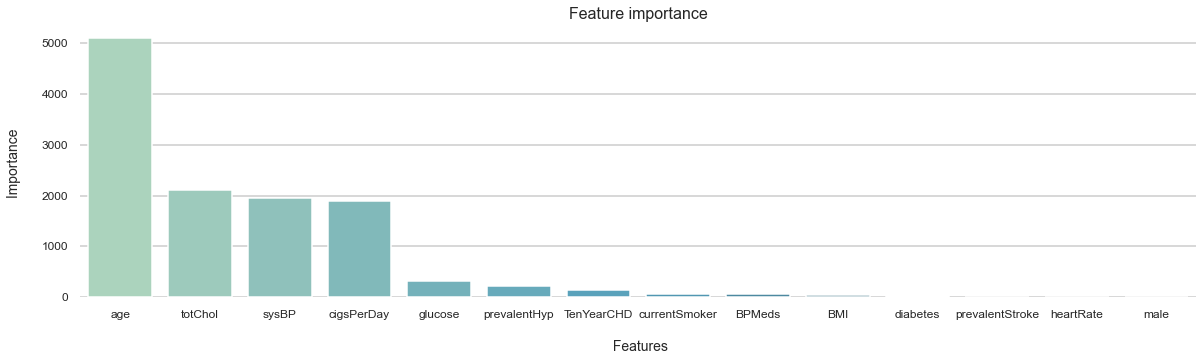

In [277]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## <a class="anchor" id="tenth-1-bullet"></a> Test - Train Split
*[Back to Top](#Top)

In [280]:
# assign the all the column names, exept 'TenYearCHD', to columns 
columns = ['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'prevalentStroke','BMI', 'glucose']

y = data_frame['TenYearCHD']
X = data_frame[columns]
# train and split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42, shuffle= False, stratify= None)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <a class="anchor" id="eleventh-1-bullet"></a> Logistic Regression
*[Back to Top](#Top)

In [281]:
clf1 = LogisticRegression(random_state=42)

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

model_clf1 = GridSearchCV(estimator=clf1, param_grid=param_grid, cv= 10)
model_clf1.fit(X_train, y_train)


90 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

-----------------------

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [282]:
model_clf1.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [283]:
clf1 = LogisticRegression(penalty = 'l1', solver = 'saga')
clf1.fit(X_train, y_train)
predictions1 = clf1.predict(X_test)
print(accuracy_score(y_test, predictions1))
print(cross_val_score(clf1, X_train, y_train, cv = 10, scoring = 'accuracy'))

0.8525943396226415
[0.84117647 0.85294118 0.85840708 0.85250737 0.85545723 0.85545723
 0.84070796 0.85840708 0.86725664 0.85250737]


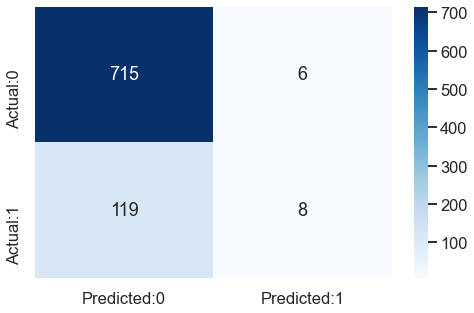

The details for confusion matrix is =


In [284]:
print('The details for confusion matrix is =') 
cm1 = confusion_matrix(y_test, predictions1) 
conf_matrix1 = pd.DataFrame(data = cm1,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [285]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       721
           1       0.57      0.06      0.11       127

    accuracy                           0.85       848
   macro avg       0.71      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848



## <a class="anchor" id="12-1-bullet"></a> Neural Networks
*[Back to Top](#Top)

In [289]:
# define a new keras model for binary classification
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.optimizers import Adam,SGD
from keras.layers.core import Dense, Dropout, Activation
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
None


In [290]:
history = binary_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose = 1, validation_data= (X_test,y_test))


Epoch 1/100
23/23 [==============================] - 2s 25ms/step - loss: 0.6005 - accuracy: 0.8381 - val_loss: 0.4804 - val_accuracy: 0.8502
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4480 - accuracy: 0.8476 - val_loss: 0.4252 - val_accuracy: 0.8502
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4300 - accuracy: 0.8476 - val_loss: 0.4229 - val_accuracy: 0.8502
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4280 - accuracy: 0.8476 - val_loss: 0.4221 - val_accuracy: 0.8502
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4300 - accuracy: 0.8476 - val_loss: 0.4214 - val_accuracy: 0.8502
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4269 - accuracy: 0.8476 - val_loss: 0.4206 - val_accuracy: 0.8502
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4273 - accuracy: 0.8476 - val_loss: 0.4199 - val_accuracy: 0.8502
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3880 - accuracy: 0.8476 - val_loss: 0.3809 - val_accuracy: 0.8502
Epoch 60/100
23/23 [==============================] - 0s 12ms/step - loss: 0.3887 - accuracy: 0.8485 - val_loss: 0.3809 - val_accuracy: 0.8514
Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3906 - accuracy: 0.8476 - val_loss: 0.3807 - val_accuracy: 0.8502
Epoch 62/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3898 - accuracy: 0.8479 - val_loss: 0.3804 - val_accuracy: 0.8514
Epoch 63/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3926 - accuracy: 0.8479 - val_loss: 0.3802 - val_accuracy: 0.8514
Epoch 64/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3896 - accuracy: 0.8479 - val_loss: 0.3813 - val_accuracy: 0.8514
Epoch 65/100
23/23 [==============================] - 0s 13ms/step - loss: 0.3922 - accuracy: 0.8485 - val_loss: 0.3802 - val_accuracy: 0.8514
Ep

In [291]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.8514150943396226
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       0.67      0.02      0.03       127

    accuracy                           0.85       848
   macro avg       0.76      0.51      0.48       848
weighted avg       0.82      0.85      0.79       848



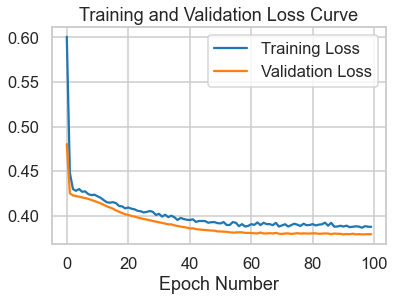

In [292]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
no_epochs = 100
epochs_range=range(no_epochs)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch Number')
plt.show()

## <a class="anchor" id="13-1-bullet"></a> Random Forest Classifier
*[Back to Top](#Top)

In [165]:
rf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 218, 236, 254,
                                                         272, 290, 309, 327,
                                                         345, 363, 381, 400,
                                                         418, 436, 454, 472,
                                                         490, 509, 527, 545,
                                                         563, 581, 600, 618,
                                                         636, 654, 672, 690,
                                                         709, 727, ...]},
                   random_state=7, verbose=2)

In [166]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       n_estimators=945)

In [167]:
clf2 = RandomForestClassifier(criterion = 'gini', max_depth = 70, max_features = 'auto', n_estimators = 1781, min_samples_split=10)
clf2.fit(X_train, y_train)
predictions2 = clf2.predict(X_test)
print(accuracy_score(y_test, predictions2))
print(cross_val_score(clf2, X_train, y_train, cv = 10, scoring = 'accuracy'))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8537735849056604


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[0.84411765 0.84411765 0.85840708 0.84660767 0.85545723 0.83480826
 0.84660767 0.84660767 0.85840708 0.84955752]


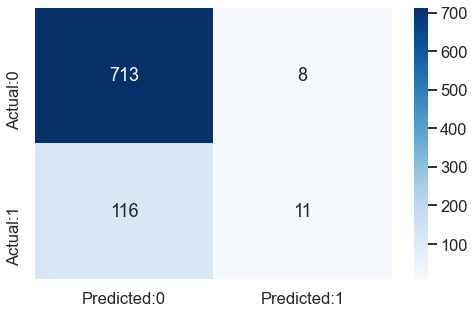

The details for confusion matrix is =


In [168]:
print('The details for confusion matrix is =') 
cm2 = confusion_matrix(y_test, predictions2) 
conf_matrix2 = pd.DataFrame(data = cm2,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [169]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       721
           1       0.58      0.09      0.15       127

    accuracy                           0.85       848
   macro avg       0.72      0.54      0.54       848
weighted avg       0.82      0.85      0.80       848



## <a class="anchor" id="14-1-bullet"></a> KNN Classifier
*[Back to Top](#Top)

In [170]:
knn = KNeighborsClassifier(n_neighbors=15)
model3 = knn.fit(X_train, y_train)
predictions3 = knn.predict(X_test)  # Store the predictions in a variable
print(accuracy_score(y_test, predictions3))
print(cross_val_score(model3, X_train, y_train, cv = 10, scoring = 'accuracy'))


0.8455188679245284
[0.83823529 0.84705882 0.84365782 0.84660767 0.85545723 0.85250737
 0.84365782 0.85250737 0.85840708 0.84955752]


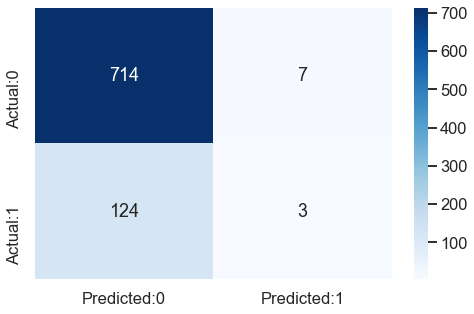

The details for confusion matrix is =


In [171]:
print('The details for confusion matrix is =') 
cm3 = confusion_matrix(y_test, predictions3) 
conf_matrix3 = pd.DataFrame(data = cm3,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix3, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [172]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       721
           1       0.30      0.02      0.04       127

    accuracy                           0.85       848
   macro avg       0.58      0.51      0.48       848
weighted avg       0.77      0.85      0.79       848



## <a class="anchor" id="15-1-bullet"></a> Gradient Boosting Classifier
*[Back to Top](#Top)

In [173]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [174]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, scoring='f1',
                   verbose=2)

In [175]:
gb_random.best_estimator_

GradientBoostingClassifier(max_depth=20, max_features='auto', n_estimators=300,
                           random_state=0)

In [176]:
model4 =  GradientBoostingClassifier(max_depth=20, max_features='auto', n_estimators=300,
                           random_state=0)
model4.fit(X_train,y_train)
prediction4 = model4.predict(X_test)
cm4 = confusion_matrix(y_test, prediction4)
gvc_acc_score = accuracy_score(y_test, prediction4)
print("confussion matrix")
print(cm4)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ADMIN\a

confussion matrix
[[606 115]
 [101  26]]


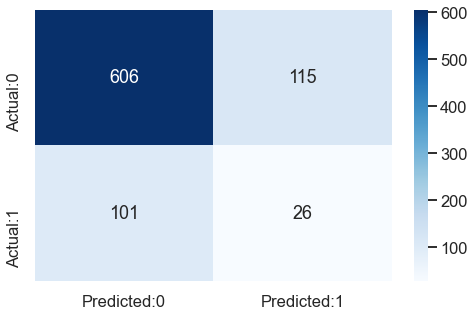

The details for confusion matrix is =


In [177]:
print('The details for confusion matrix is =') 
cm4 = confusion_matrix(y_test, prediction4) 
conf_matrix4 = pd.DataFrame(data = cm4,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix4, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [178]:
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       721
           1       0.18      0.20      0.19       127

    accuracy                           0.75       848
   macro avg       0.52      0.52      0.52       848
weighted avg       0.76      0.75      0.75       848



## <a class="anchor" id="16-1-bullet"></a> Support Vector Classifier
*[Back to Top](#Top)

In [179]:
classifier = SVC(random_state=42)

param_grid = { 
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'gamma' : ['scale', 'auto']
}

gscv_clf5 = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 10)
gscv_clf5.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [180]:
gscv_clf5.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [181]:
clf5 = SVC(degree = 2, gamma = 'scale', kernel= 'poly')
clf5.fit(X_train, y_train)
print(cross_val_score(clf5, X_train, y_train, cv = 10, scoring = 'accuracy'))
predictions5 = clf5.predict(X_test)

[0.84117647 0.84705882 0.85250737 0.85250737 0.86430678 0.85250737
 0.84660767 0.84660767 0.85250737 0.84955752]


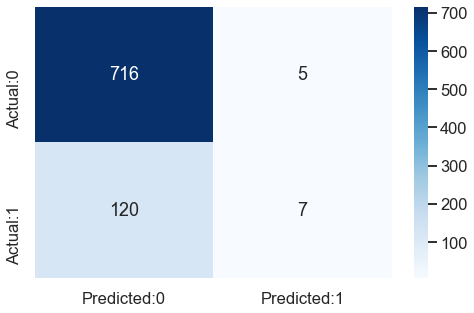

The details for confusion matrix is =


In [182]:
print('The details for confusion matrix is =') 
cm5 = confusion_matrix(y_test, predictions5) 
conf_matrix5 = pd.DataFrame(data = cm5,  
            columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix5, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [183]:
print(classification_report(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       721
           1       0.58      0.06      0.10       127

    accuracy                           0.85       848
   macro avg       0.72      0.52      0.51       848
weighted avg       0.82      0.85      0.80       848



## <a class="anchor" id="17-1-bullet"></a> Decision Tree Classifier
*[Back to Top](#Top)


In [184]:
from sklearn.tree import DecisionTreeClassifier
clf6 = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
clf6.fit(X_train, y_train)
predictions6 = clf6.predict(X_test)

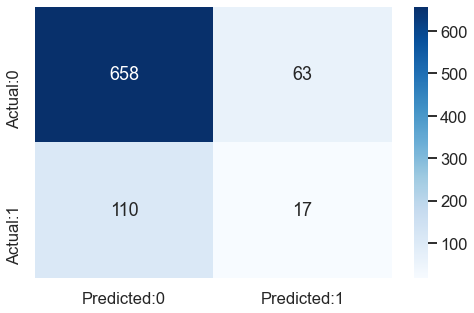

The details for confusion matrix is =


In [185]:
print('The details for confusion matrix is =') 
cm6 = confusion_matrix(y_test, predictions6) 
conf_matrix6 = pd.DataFrame(data = cm6,  
            columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix6, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [186]:
print(classification_report(y_test, predictions6))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       721
           1       0.21      0.13      0.16       127

    accuracy                           0.80       848
   macro avg       0.53      0.52      0.52       848
weighted avg       0.76      0.80      0.78       848



## <a class="anchor" id="18-1-bullet"></a> ROC Curves
*[Back to Top](#Top)

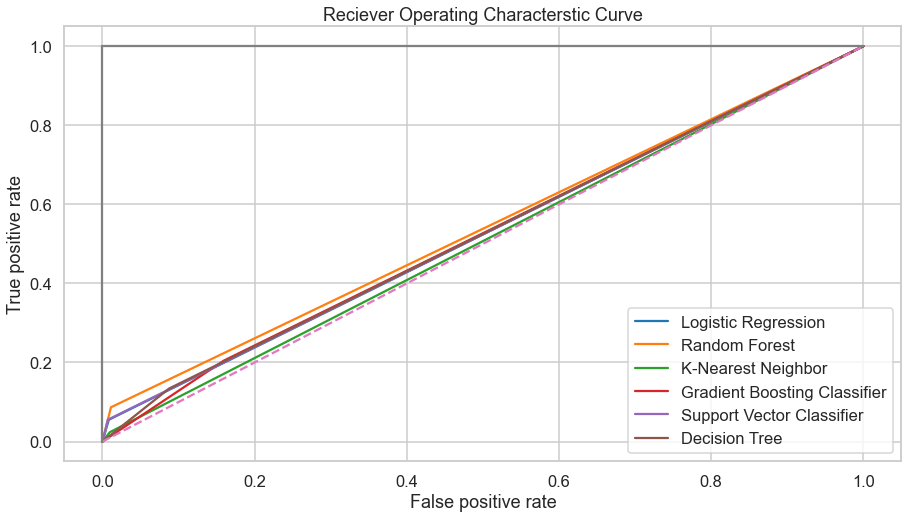

In [187]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,predictions1)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,predictions3)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,predictions2)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,predictions6)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,predictions5)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(y_test,prediction4)

sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(svc_false_positive_rate,svc_true_positive_rate, label='Support Vector Classifier')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

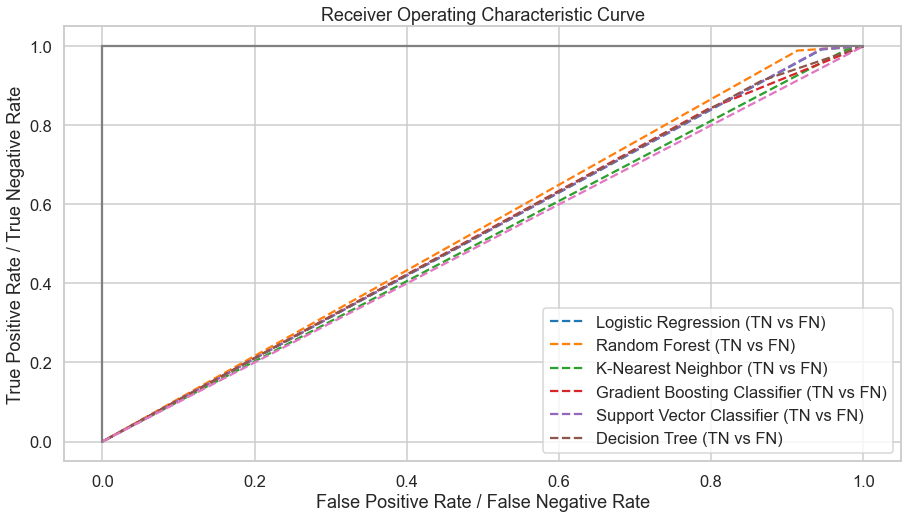

In [188]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the variables 'y_test' and predictions for different models

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), True Negative Rate (TNR), and False Negative Rate (FNR) for each model
lr_false_positive_rate, lr_true_positive_rate, _ = roc_curve(y_test, predictions1)
knn_false_positive_rate, knn_true_positive_rate, _ = roc_curve(y_test, predictions3)
rf_false_positive_rate, rf_true_positive_rate, _ = roc_curve(y_test, predictions2)
dt_false_positive_rate, dt_true_positive_rate, _ = roc_curve(y_test, predictions6)
svc_false_positive_rate, svc_true_positive_rate, _ = roc_curve(y_test, predictions5)
gbc_false_positive_rate, gbc_true_positive_rate, _ = roc_curve(y_test, prediction4)

# Calculate True Negative Rate (TNR) and False Negative Rate (FNR)
lr_true_negative_rate = 1 - lr_false_positive_rate
knn_true_negative_rate = 1 - knn_false_positive_rate
rf_true_negative_rate = 1 - rf_false_positive_rate
dt_true_negative_rate = 1 - dt_false_positive_rate
svc_true_negative_rate = 1 - svc_false_positive_rate
gbc_true_negative_rate = 1 - gbc_false_positive_rate

lr_false_negative_rate = 1 - lr_true_positive_rate
knn_false_negative_rate = 1 - knn_true_positive_rate
rf_false_negative_rate = 1 - rf_true_positive_rate
dt_false_negative_rate = 1 - dt_true_positive_rate
svc_false_negative_rate = 1 - svc_true_positive_rate
gbc_false_negative_rate = 1 - gbc_true_positive_rate

# Plot ROC curve for True Positive Rate (TPR) vs False Positive Rate (FPR)
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8), facecolor='w')
plt.title('Receiver Operating Characteristic Curve')

# plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
# plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
# plt.plot(knn_false_positive_rate, knn_true_positive_rate, label='K-Nearest Neighbor')
# plt.plot(gbc_false_positive_rate, gbc_true_positive_rate, label='Gradient Boosting Classifier')
# plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')
# plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')

# Plot ROC curve for True Negative Rate (TNR) vs False Negative Rate (FNR)
plt.plot(lr_false_negative_rate, lr_true_negative_rate, label='Logistic Regression (TN vs FN)', linestyle='--')
plt.plot(rf_false_negative_rate, rf_true_negative_rate, label='Random Forest (TN vs FN)', linestyle='--')
plt.plot(knn_false_negative_rate, knn_true_negative_rate, label='K-Nearest Neighbor (TN vs FN)', linestyle='--')
plt.plot(gbc_false_negative_rate, gbc_true_negative_rate, label='Gradient Boosting Classifier (TN vs FN)', linestyle='--')
plt.plot(svc_false_negative_rate, svc_true_negative_rate, label='Support Vector Classifier (TN vs FN)', linestyle='--')
plt.plot(dt_false_negative_rate, dt_true_negative_rate, label='Decision Tree (TN vs FN)', linestyle='--')

plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.5')
plt.plot([1, 1], c='.5')

plt.ylabel('True Positive Rate / True Negative Rate')
plt.xlabel('False Positive Rate / False Negative Rate')
plt.legend()
plt.show()


## <a class="anchor" id="seventh-bullet"></a> Detection using Balanced Data
*[Back to Top](#Top)

In [189]:
target1=data_frame[data_frame['TenYearCHD']==1]
target0=data_frame[data_frame['TenYearCHD']==0]

## <a class="anchor" id="eighth-bullet"></a> Data Resampling
*[Back to Top](#Top)

In [190]:
from sklearn.utils import resample
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

In [191]:
df_data = target

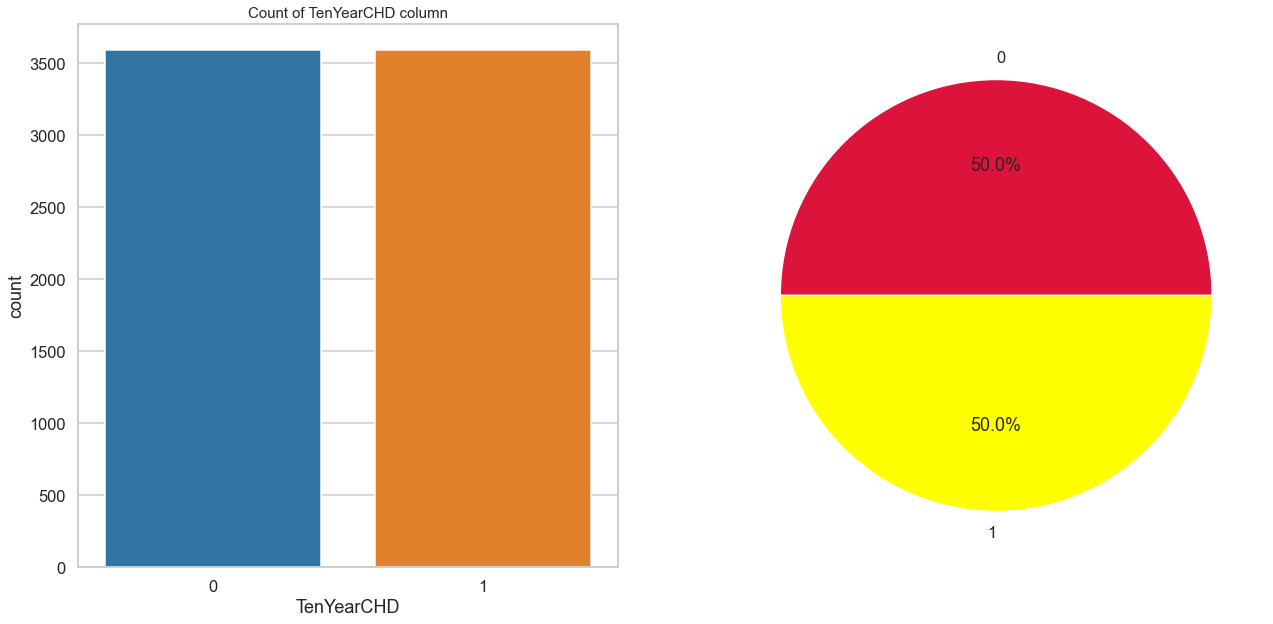

In [192]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df_data)
plt.title("Count of TenYearCHD column", size=15)
plt.subplot(122)
labels=[0,1]
plt.pie(df_data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["crimson","yellow"])
plt.show()

## <a class="anchor" id="ninth-bullet"></a> Feature Selection
*[Back to Top](#Top)

In [193]:
# separate independent & dependent variables
X = df_data.iloc[:,0:14]  #independent columns
y = df_data.iloc[:,-1]    

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features
print(X.shape)

            Specs        Score
1             age  8430.084562
9           sysBP  4655.916774
3      cigsPerDay  3682.440590
8         totChol  2638.374544
13        glucose   988.847534
10          diaBP   530.510588
6    prevalentHyp   409.260357
4          BPMeds   169.939164
2   currentSmoker   153.254348
11            BMI    59.512795
7        diabetes    48.331943
(7192, 14)


In [194]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs        Score
1               age  8430.084562
9             sysBP  4655.916774
3        cigsPerDay  3682.440590
8           totChol  2638.374544
13          glucose   988.847534
10            diaBP   530.510588
6      prevalentHyp   409.260357
4            BPMeds   169.939164
2     currentSmoker   153.254348
11              BMI    59.512795
7          diabetes    48.331943
5   prevalentStroke    39.770670
12        heartRate    11.167369
0              male     7.561961

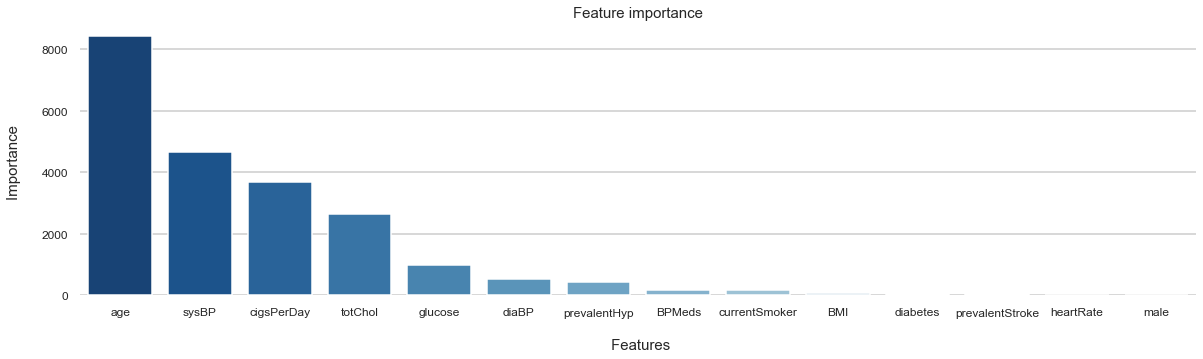

In [195]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "Blues_r")
plt.box(False)
plt.title('Feature importance', fontsize=15)
plt.xlabel('\n Features', fontsize=15)
plt.ylabel('Importance \n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## <a class="anchor" id="tenth-bullet"></a> Test - Train Split
*[Back to Top](#Top)

In [196]:
# assign the all the column names, exept 'TenYearCHD', to columns 
columns = ['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'prevalentStroke','BMI', 'glucose']

y = df_data['TenYearCHD']
X = df_data[columns]
# train and split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
%store X_train
%store X_test

Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)


## <a class="anchor" id="eleventh-bullet"></a> Logistic Regression
*[Back to Top](#Top)

In [197]:
clf1_1= LogisticRegression(random_state=1)

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

model_clf1_1 = GridSearchCV(estimator=clf1_1, param_grid=param_grid)
model_clf1_1.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Value

GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [198]:
model_clf1_1.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [199]:
clf1_1 = LogisticRegression(penalty = 'l2', solver = 'newton-cg')
clf1_1.fit(X_train, y_train)
predictions1_1 = clf1_1.predict(X_test)
print(accuracy_score(y_test, predictions1_1))
print(cross_val_score(clf1_1, X_train, y_train,scoring = 'accuracy'))

0.657397107897664
[0.68952734 0.66635774 0.66543095 0.67933272 0.66326531]


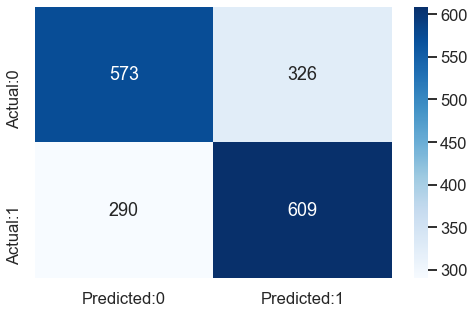

The details for confusion matrix is =


In [200]:
print('The details for confusion matrix is =') 
cm1_1 = confusion_matrix(y_test, predictions1_1) 
conf_matrix1_1 = pd.DataFrame(data = cm1_1,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1_1, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [201]:
print(classification_report(y_test, predictions1_1))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       899
           1       0.65      0.68      0.66       899

    accuracy                           0.66      1798
   macro avg       0.66      0.66      0.66      1798
weighted avg       0.66      0.66      0.66      1798



## <a class="anchor" id="12-bullet"></a> Neural Networks
*[Back to Top](#Top)

In [202]:
# define a new keras model for binary classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.layers import Dense, Dropout, Activation
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1300      
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,361
Trainable params: 4,361
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\ADMIN\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [203]:
history = binary_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose = 1, validation_data= (X_test,y_test))


Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: 0.6892 - accuracy: 0.5729 - val_loss: 0.6852 - val_accuracy: 0.6457
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6190 - val_loss: 0.6775 - val_accuracy: 0.6179
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6311 - val_loss: 0.6691 - val_accuracy: 0.6129
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.6277 - val_loss: 0.6609 - val_accuracy: 0.6123
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6571 - accuracy: 0.6307 - val_loss: 0.6542 - val_accuracy: 0.6135
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6292 - val_loss: 0.6489 - val_accuracy: 0.6135
Epoch 7/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.6331 - val_loss: 0.6446 - val_accuracy: 0.6129
Epoch 8/100


Epoch 59/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.6700 - val_loss: 0.6142 - val_accuracy: 0.6657
Epoch 60/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.6663 - val_loss: 0.6142 - val_accuracy: 0.6669
Epoch 61/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.6750 - val_loss: 0.6129 - val_accuracy: 0.6635
Epoch 62/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.6698 - val_loss: 0.6132 - val_accuracy: 0.6663
Epoch 63/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.6743 - val_loss: 0.6135 - val_accuracy: 0.6641
Epoch 64/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.6676 - val_loss: 0.6132 - val_accuracy: 0.6646
Epoch 65/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.6748 - val_loss: 0.6129 - val_accuracy: 0.6663
Epoch 

In [204]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.6674082313681868
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       899
           1       0.65      0.71      0.68       899

    accuracy                           0.67      1798
   macro avg       0.67      0.67      0.67      1798
weighted avg       0.67      0.67      0.67      1798



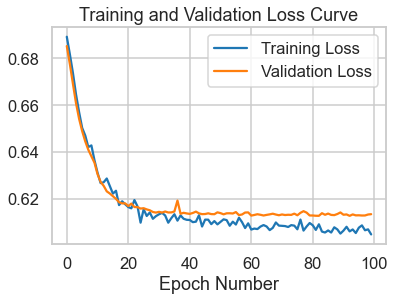

In [205]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
no_epochs = 100
epochs_range=range(no_epochs)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch Number')
plt.show()

## <a class="anchor" id="13-bullet"></a> Random Forest Classifier
*[Back to Top](#Top)

In [206]:
rf = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 218, 236, 254,
                                                         272, 290, 309, 327,
                                                         345, 363, 381, 400,
                                                         418, 436, 454, 472,
                                                         490, 509, 527, 545,
                                                         563, 581, 600, 618,
                                                         636, 654, 672, 690,
                                                         709, 727, ...]},
                   random_state=7, verbose=2)

In [207]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto',
                       n_estimators=272)

In [208]:
clf1_2 = rf_random.best_estimator_
clf1_2.fit(X_train, y_train)
predictions1_2 = clf1_2.predict(X_test)
print(accuracy_score(y_test, predictions1_2))
print(cross_val_score(clf1_2, X_train, y_train, cv = 3, scoring = 'accuracy'))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9783092324805339


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

[0.94215795 0.93325918 0.92714127]


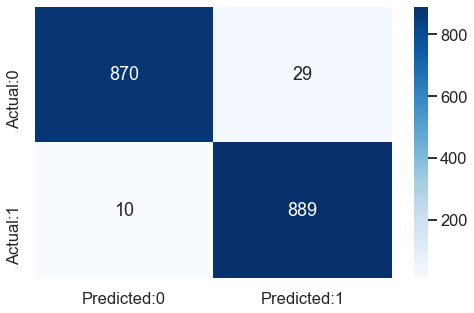

The details for confusion matrix is =


In [209]:
print('The details for confusion matrix is =') 
cm1_2 = confusion_matrix(y_test, predictions1_2) 
conf_matrix1_2 = pd.DataFrame(data = cm1_2,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1_2, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [210]:
print(classification_report(y_test, predictions1_2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       899
           1       0.97      0.99      0.98       899

    accuracy                           0.98      1798
   macro avg       0.98      0.98      0.98      1798
weighted avg       0.98      0.98      0.98      1798



## <a class="anchor" id="14-bullet"></a> KNN Classifier
*[Back to Top](#Top)

In [211]:
param_grid = {'n_neighbors': [1,5,10,25,50,100],
              'weights': ['uniform','distance'],
              'algorithm': ['auto','ball_tree','kd_tree']}


In [212]:
knn=KNeighborsClassifier()
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
knn_random = GridSearchCV(knn,param_grid,cv=3,scoring='f1')

# Fit the random search model
knn_random.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 5, 10, 25, 50, 100],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [213]:
knn_random.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [214]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform',algorithm='auto')
model1_3 = knn.fit(X_train, y_train)
predictions1_3 = knn.predict(X_test)
print(accuracy_score(y_test, predictions1_3))
print(cross_val_score(model1_3, X_train, y_train, cv = 10, scoring = 'accuracy'))

0.9010011123470523
[0.90555556 0.9        0.88888889 0.91851852 0.89981447 0.8961039
 0.93877551 0.90909091 0.88497217 0.90723562]


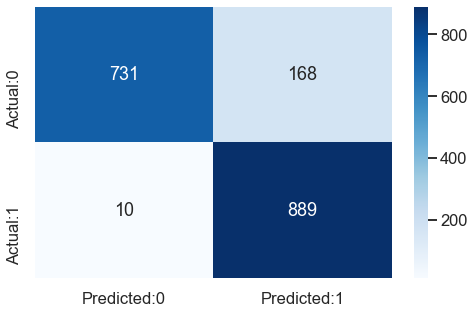

The details for confusion matrix is =


In [215]:
print('The details for confusion matrix is =') 
cm1_3 = confusion_matrix(y_test, predictions1_3) 
conf_matrix1_3 = pd.DataFrame(data = cm1_3,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1_3, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [216]:
print(classification_report(y_test, predictions1_3))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       899
           1       0.84      0.99      0.91       899

    accuracy                           0.90      1798
   macro avg       0.91      0.90      0.90      1798
weighted avg       0.91      0.90      0.90      1798



## <a class="anchor" id="15-bullet"></a> Gradient Boosting Classifier
*[Back to Top](#Top)

In [217]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [218]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, scoring='f1',
                   verbose=2)

In [219]:
gb_random.best_estimator_

GradientBoostingClassifier(max_depth=20, max_features='sqrt',
                           min_samples_split=5, n_estimators=1000,
                           random_state=0)

In [220]:
import pickle

In [221]:
model1_4 =  GradientBoostingClassifier(max_depth=40, max_features='sqrt', n_estimators=900,min_samples_split=5, random_state=0)
model1_4.fit(X_train,y_train)
prediction1_4 = model1_4.predict(X_test)
cm1_4 = confusion_matrix(y_test, prediction1_4)
gvc_acc_score = accuracy_score(y_test, prediction1_4)
filename = 'finalized_model.sav'
pickle.dump(model1_4, open(filename, 'wb'))

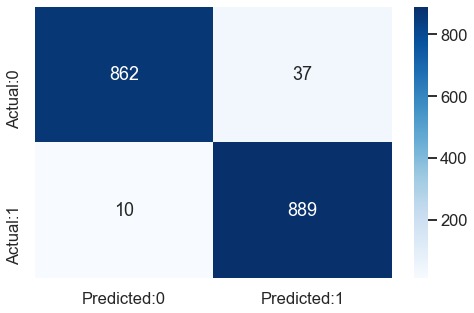

The details for confusion matrix is =


In [222]:
print('The details for confusion matrix is =') 
cm1_4 = confusion_matrix(y_test, prediction1_4) 
conf_matrix1_4 = pd.DataFrame(data = cm1_4,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1_4, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [223]:
print(classification_report(y_test, prediction1_4))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       899
           1       0.96      0.99      0.97       899

    accuracy                           0.97      1798
   macro avg       0.97      0.97      0.97      1798
weighted avg       0.97      0.97      0.97      1798



## <a class="anchor" id="16-bullet"></a> Support Vector Classifier
*[Back to Top](#Top)

In [224]:
classifier = SVC(random_state=42)

param_grid = { 
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'gamma' : ['scale', 'auto']
}

gscv_clf1_5 = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 10)
gscv_clf1_5.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [225]:
gscv_clf1_5.best_params_

{'degree': 6, 'gamma': 'scale', 'kernel': 'poly'}

In [226]:
clf1_5 = SVC(degree = 6, gamma = 'scale', kernel= 'poly')
clf1_5.fit(X_train, y_train)
print(cross_val_score(clf1_5, X_train, y_train, cv = 3, scoring = 'accuracy'))
prediction1_5 = clf1_5.predict(X_test)

[0.69466073 0.68186874 0.69076752]


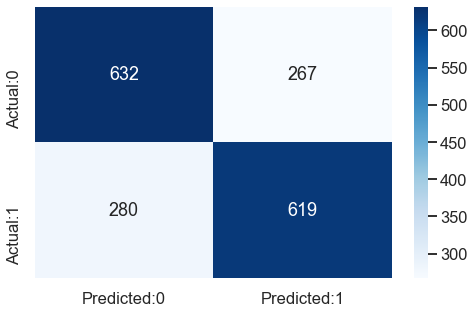

The details for confusion matrix is =


In [227]:
print('The details for confusion matrix is =') 
cm1_5 = confusion_matrix(y_test, prediction1_5) 
conf_matrix1_5 = pd.DataFrame(data = cm1_5,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1_5, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [228]:
print(classification_report(y_test, prediction1_5))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       899
           1       0.70      0.69      0.69       899

    accuracy                           0.70      1798
   macro avg       0.70      0.70      0.70      1798
weighted avg       0.70      0.70      0.70      1798



## <a class="anchor" id="17-bullet"></a> Decision Tree Classifier
*[Back to Top](#Top)

In [229]:
from sklearn.tree import DecisionTreeClassifier
random_grid = {'criterion': ['gini', 'entropy'], 
               'max_depth': [1,5,10,20,50,100], 
               'max_features': [None],
               'min_samples_split': [2,5,10]}

dt=DecisionTreeClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
dt_random.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 100],
                                        'max_features': [None],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=0, return_train_score=True, scoring='f1',
                   verbose=2)

In [230]:
dt_random.best_estimator_

DecisionTreeClassifier(max_depth=50, random_state=0)

In [231]:
clf1_6 = DecisionTreeClassifier(criterion='entropy',max_depth=50, random_state=0) 
clf1_6.fit(X_train, y_train)
prediction1_6 = clf1_6.predict(X_test)

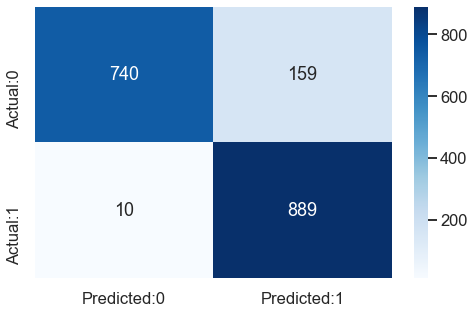

The details for confusion matrix is =


In [232]:
print('The details for confusion matrix is =') 
cm1_6 = confusion_matrix(y_test, prediction1_6) 
conf_matrix1_6 = pd.DataFrame(data = cm1_6,  
            columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix1_6, annot = True, fmt = 'd', cmap = "Blues") 
plt.show() 
  


In [233]:
print(classification_report(y_test, prediction1_6))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       899
           1       0.85      0.99      0.91       899

    accuracy                           0.91      1798
   macro avg       0.92      0.91      0.91      1798
weighted avg       0.92      0.91      0.91      1798



## <a class="anchor" id="18-bullet"></a> ROC Curves
*[Back to Top](#Top)

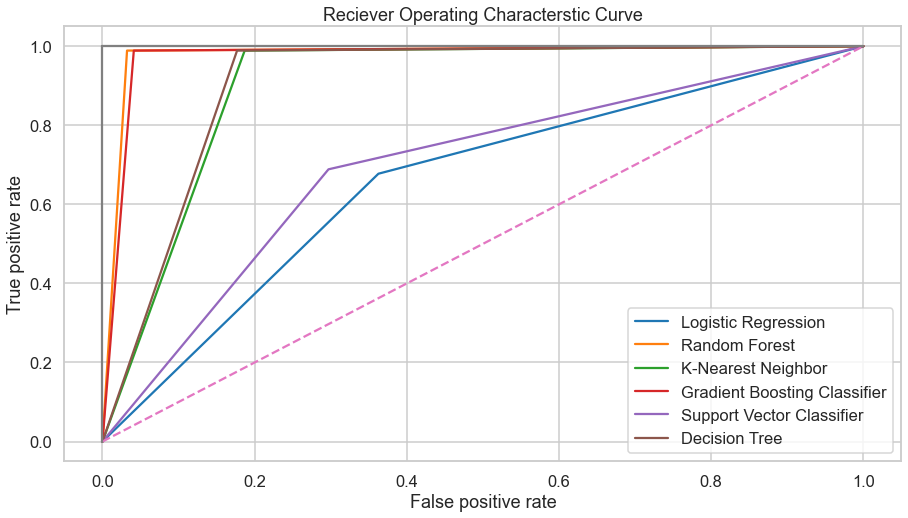

In [234]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,predictions1_1)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,predictions1_3)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,predictions1_2)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,prediction1_6)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,prediction1_5)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(y_test,prediction1_4)

sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(svc_false_positive_rate,svc_true_positive_rate, label='Support Vector Classifier')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

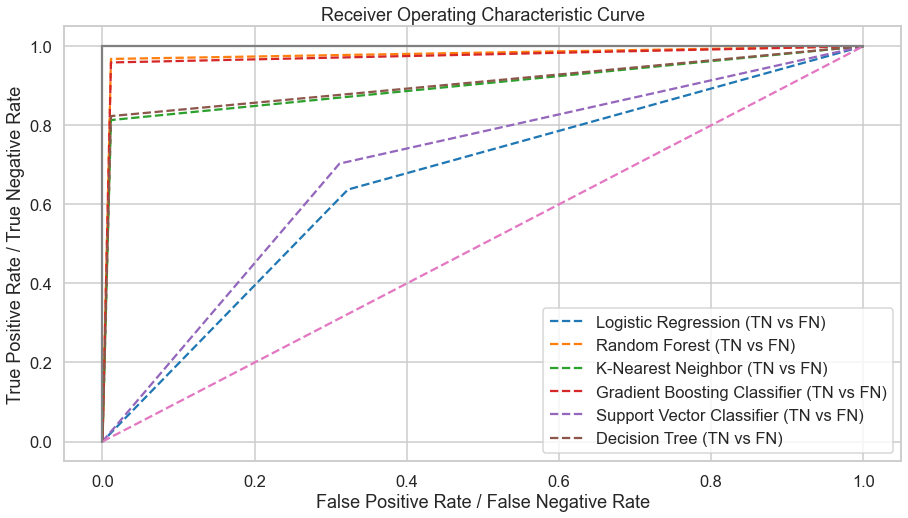

In [268]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the variables 'y_test' and predictions for different models

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), True Negative Rate (TNR), and False Negative Rate (FNR) for each model
lr_false_positive_rate, lr_true_positive_rate, _ = roc_curve(y_test, predictions1_1)
knn_false_positive_rate, knn_true_positive_rate, _ = roc_curve(y_test, predictions1_3)
rf_false_positive_rate, rf_true_positive_rate, _ = roc_curve(y_test, predictions1_2)
dt_false_positive_rate, dt_true_positive_rate, _ = roc_curve(y_test, prediction1_6)
svc_false_positive_rate, svc_true_positive_rate, _ = roc_curve(y_test, prediction1_5)
gbc_false_positive_rate, gbc_true_positive_rate, _ = roc_curve(y_test, prediction1_4)

# Calculate True Negative Rate (TNR) and False Negative Rate (FNR)
lr_true_negative_rate = 1 - lr_false_positive_rate
knn_true_negative_rate = 1 - knn_false_positive_rate
rf_true_negative_rate = 1 - rf_false_positive_rate
dt_true_negative_rate = 1 - dt_false_positive_rate
svc_true_negative_rate = 1 - svc_false_positive_rate
gbc_true_negative_rate = 1 - gbc_false_positive_rate

lr_false_negative_rate = 1 - lr_true_positive_rate
knn_false_negative_rate = 1 - knn_true_positive_rate
rf_false_negative_rate = 1 - rf_true_positive_rate
dt_false_negative_rate = 1 - dt_true_positive_rate
svc_false_negative_rate = 1 - svc_true_positive_rate
gbc_false_negative_rate = 1 - gbc_true_positive_rate

# Plot ROC curve for True Positive Rate (TPR) vs False Positive Rate (FPR)
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8), facecolor='w')
plt.title('Receiver Operating Characteristic Curve')

# plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
# plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
# plt.plot(knn_false_positive_rate, knn_true_positive_rate, label='K-Nearest Neighbor')
# plt.plot(gbc_false_positive_rate, gbc_true_positive_rate, label='Gradient Boosting Classifier')
# plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')
# plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')

# Plot ROC curve for True Negative Rate (TNR) vs False Negative Rate (FNR)
plt.plot(lr_false_negative_rate, lr_true_negative_rate, label='Logistic Regression (TN vs FN)', linestyle='--')
plt.plot(rf_false_negative_rate, rf_true_negative_rate, label='Random Forest (TN vs FN)', linestyle='--')
plt.plot(knn_false_negative_rate, knn_true_negative_rate, label='K-Nearest Neighbor (TN vs FN)', linestyle='--')
plt.plot(gbc_false_negative_rate, gbc_true_negative_rate, label='Gradient Boosting Classifier (TN vs FN)', linestyle='--')
plt.plot(svc_false_negative_rate, svc_true_negative_rate, label='Support Vector Classifier (TN vs FN)', linestyle='--')
plt.plot(dt_false_negative_rate, dt_true_negative_rate, label='Decision Tree (TN vs FN)', linestyle='--')

plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.5')
plt.plot([1, 1], c='.5')

plt.ylabel('True Positive Rate / True Negative Rate')
plt.xlabel('False Positive Rate / False Negative Rate')
plt.legend()
plt.show()


## <a class="anchor" id="19-bullet"></a> Feature Importance using LIME
*[Back to Top](#Top)

In [235]:
var_names = ['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
            'diaBP', 'prevalentStroke','BMI', 'glucose']
var_= {'variable_name':var_names, "coefficient":model1_4.feature_importances_}
var_importance = pd.DataFrame(var_)

In [236]:
model1_4.feature_importances_

array([0.16534318, 0.01345175, 0.05777323, 0.00510994, 0.0294306 ,
       0.00752381, 0.14305391, 0.15069866, 0.13034919, 0.00226041,
       0.16170599, 0.13329932])

In [237]:
from lime import lime_tabular
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
import random

In [238]:
explainer = LimeTabularExplainer(training_data= X_train, 
                                 mode= "classification", 
                                 feature_names= columns,
                                 verbose=True, 
                                 class_names=['0','1'])

In [239]:
test_sample = X_test[148,:]
exp = explainer.explain_instance(data_row=test_sample,predict_fn= model1_4.predict_proba, num_features=12)
exp

Intercept 0.05084158617661621
Prediction_local [0.08603011]
Right: 0.9999999917407415


In [240]:
 print('R²:' + str(exp.score))

R²:0.05666631500249186


In [241]:
exp.local_exp

{1: [(4, 0.06282902899051593),
  (7, 0.0394902548398252),
  (11, -0.020134450852876278),
  (3, -0.018671794590151086),
  (6, -0.017690903980649063),
  (0, 0.017415436023978884),
  (9, -0.015763245195948822),
  (2, -0.015402238524079372),
  (8, -0.012694852785839353),
  (10, 0.008340654117283125),
  (5, 0.0058223186250031716),
  (1, 0.001648318586832022)]}

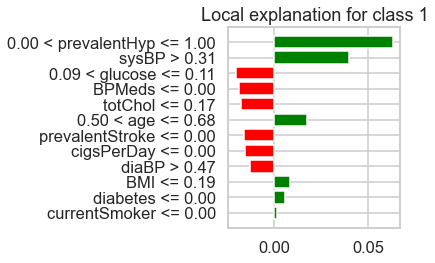

In [242]:
plt = exp.as_pyplot_figure()
plt.tight_layout()

In [243]:
coefs = pd.DataFrame(exp.as_list())[1].sum()
probability = coefs + exp.intercept[1]
print('The probability of class 1 is :', probability )
pd.DataFrame(exp.as_list())

The probability of class 1 is : 0.08603011143051056


0         1
0   0.00 < prevalentHyp <= 1.00  0.062829
1                  sysBP > 0.31  0.039490
2        0.09 < glucose <= 0.11 -0.020134
3                BPMeds <= 0.00 -0.018672
4               totChol <= 0.17 -0.017691
5            0.50 < age <= 0.68  0.017415
6       prevalentStroke <= 0.00 -0.015763
7            cigsPerDay <= 0.00 -0.015402
8                  diaBP > 0.47 -0.012695
9                   BMI <= 0.19  0.008341
10             diabetes <= 0.00  0.005822
11        currentSmoker <= 0.00  0.001648

In [244]:
exp.show_in_notebook(show_table = True, show_all = False)

In [245]:
print ('Explanation for class %s' % exp.class_names[0])
print ('\n'.join(map(str, exp.as_list())))

Explanation for class 0
('0.00 < prevalentHyp <= 1.00', 0.06282902899051593)
('sysBP > 0.31', 0.0394902548398252)
('0.09 < glucose <= 0.11', -0.020134450852876278)
('BPMeds <= 0.00', -0.018671794590151086)
('totChol <= 0.17', -0.017690903980649063)
('0.50 < age <= 0.68', 0.017415436023978884)
('prevalentStroke <= 0.00', -0.015763245195948822)
('cigsPerDay <= 0.00', -0.015402238524079372)
('diaBP > 0.47', -0.012694852785839353)
('BMI <= 0.19', 0.008340654117283125)
('diabetes <= 0.00', 0.0058223186250031716)
('currentSmoker <= 0.00', 0.001648318586832022)


In [246]:
d1 = {'age' : 'Age' , 'currentSmoker' : 'Smoking' ,
           'cigsPerDay' : 'High Smoking' , 'BPMeds' : 'BP Medication' ,
           'prevalentHyp' : 'Hypertension', 'diabetes' : 'Diabetes' ,
           'totChol' : 'Cholesterol' , 'sysBP' : 'Systolic Blood Pressure' ,
           'diaBP' : 'Diastolic Blood Pressure' , 'prevalentStroke' : 'Stroke' ,
            'BMI' : 'Body Mass Index' , 'glucose' : 'Glucose'}

In [247]:
if (exp.predict_proba[1] > 0.50):
    high = 0
    col = ''
    for t in exp.as_list():
        if t[1] > high:
            high = t[1]
            ls = t[0].split()
            for i in ls:
                if i[0].isalpha():
                    col = i
                    break   
##    print(col)  
    marker = 1
    print("The algorithm predicts that you may have heart disease because of column :", d1.get(col))
    disease = d1.get(col)
else:
    print("The algorithm predicts that you may not have a heart disease")

The algorithm predicts that you may have heart disease because of column : Hypertension


## <a class="anchor" id="20-bullet"></a> Disease Prevention Using Web Crawling
*[Back to Top](#Top)

In [251]:
disease_mapping = {'Age' : 'https://my.clevelandclinic.org/health/diseases/16891-heart-disease-adult-congenital-heart-disease' ,  
                   'BP Medication' : 'https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure' , 
                   'Hypertension' : 'https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure' , 
                   'Diabetes' : 'https://my.clevelandclinic.org/health/diseases/9812-diabetes-and-stroke' ,
                   'Cholesterol' : 'https://my.clevelandclinic.org/health/diseases/21656-hyperlipidemia' , 
                   'Systolic Blood Pressure' : 'https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure' ,
                   'Diastolic Blood Pressure' : 'https://my.clevelandclinic.org/health/diseases/4314-hypertension-high-blood-pressure' , 
                    'Stroke' : 'https://my.clevelandclinic.org/health/diseases/5601-stroke' ,
                   'Glucose' : 'https://my.clevelandclinic.org/health/diseases/9815-hyperglycemia-high-blood-sugar'}

In [252]:
disease_mapping_1 = {'High Smoking' : 
                     '''1. Get rid of all cigarettes and anything related to smoking, like lighters and ashtrays
                      2. When you get the urge to smoke, take a deep breath. Hold it for ten seconds and release it slowly. Repeat this several times until the urge to smoke is gone. You can also try meditation to reduce baseline stress levels.
                      3. Drink plenty of fluids, but limit caffeinated beverages and beverages containing alcohol
                      4. Don’t forget to exercise, because it has health benefits and help you relax.''' ,
                     'Smoking' :
                    '''1. Get rid of all cigarettes and anything related to smoking, like lighters and ashtrays
                      2. When you get the urge to smoke, take a deep breath. Hold it for ten seconds and release it slowly. Repeat this several times until the urge to smoke is gone. You can also try meditation to reduce baseline stress levels.
                      3. Drink plenty of fluids, but limit caffeinated beverages and beverages containing alcohol
                      4. Don’t forget to exercise, because it has health benefits and help you relax.''',
                     'Body Mass Index' : 
                     '''1 . 150 minutes a week of aerobic exercise can help reduce abdominal fat and overall obesity. That works out to 30 minutes of activity, five days a week. Choosing activities that you enjoy, such as brisk walking, dancing or swimming, can help you stay motivated.
                        2.  Eating fewer calories can help reduce abdominal fat. Changing your diet can also help you lose weight and improve overall obesity.
                        3. his diet includes eating mostly plant-based foods such as root and green vegetables, fresh fruits, legumes, nuts and whole grains, plus moderate servings of dairy, eggs, fish, lean poultry and seafood.'''}

In [269]:
import bs4 as bs
import requests # For Web Scraping

print("Prevention tips for ${disease}\n")
if (marker == 1):
    if disease in disease_mapping:
        url = disease_mapping.get(disease)
        page = requests.get(url)
        soup = bs.BeautifulSoup(page.text)
        out = ""
        for i, val in enumerate(soup.find('div', id = 'prevention').find_all('li')):
            print(f"{i+1}. {val.text}\n")
            out+=val.text
    elif disease in disease_mapping_1:
        output = disease_mapping_1.get(disease)
        print(outside)


1. Follow a healthy eating plan. This is an important step in keeping your blood pressure normal. The DASH diet (Dietary Approaches to Stop Hypertension) emphasizes adding fruits, vegetables and whole grains to your diet.

2. Cut down on sodium. To prevent hypertension, you should reduce the amount of sodium in your diet. Try to keep it below 1,500 milligrams a day.

3. Keep a healthy weight. Going hand-in-hand with a proper diet is keeping a weight that’s healthy for you. Losing excess weight with diet and exercise will help lower your blood pressure to healthier levels.

4. Keep active. Even simple physical activities, such as walking, can lower your blood pressure (and your weight).

5. Drink alcohol in moderation. Having more than one drink a day (for women or people assigned female at birth) or more than two drinks a day (for men or people assigned male at birth) can raise blood pressure. One drink is defined as 1 ounce (oz) of alcohol, 5 ounces of wine or 12 ounces of beer.

